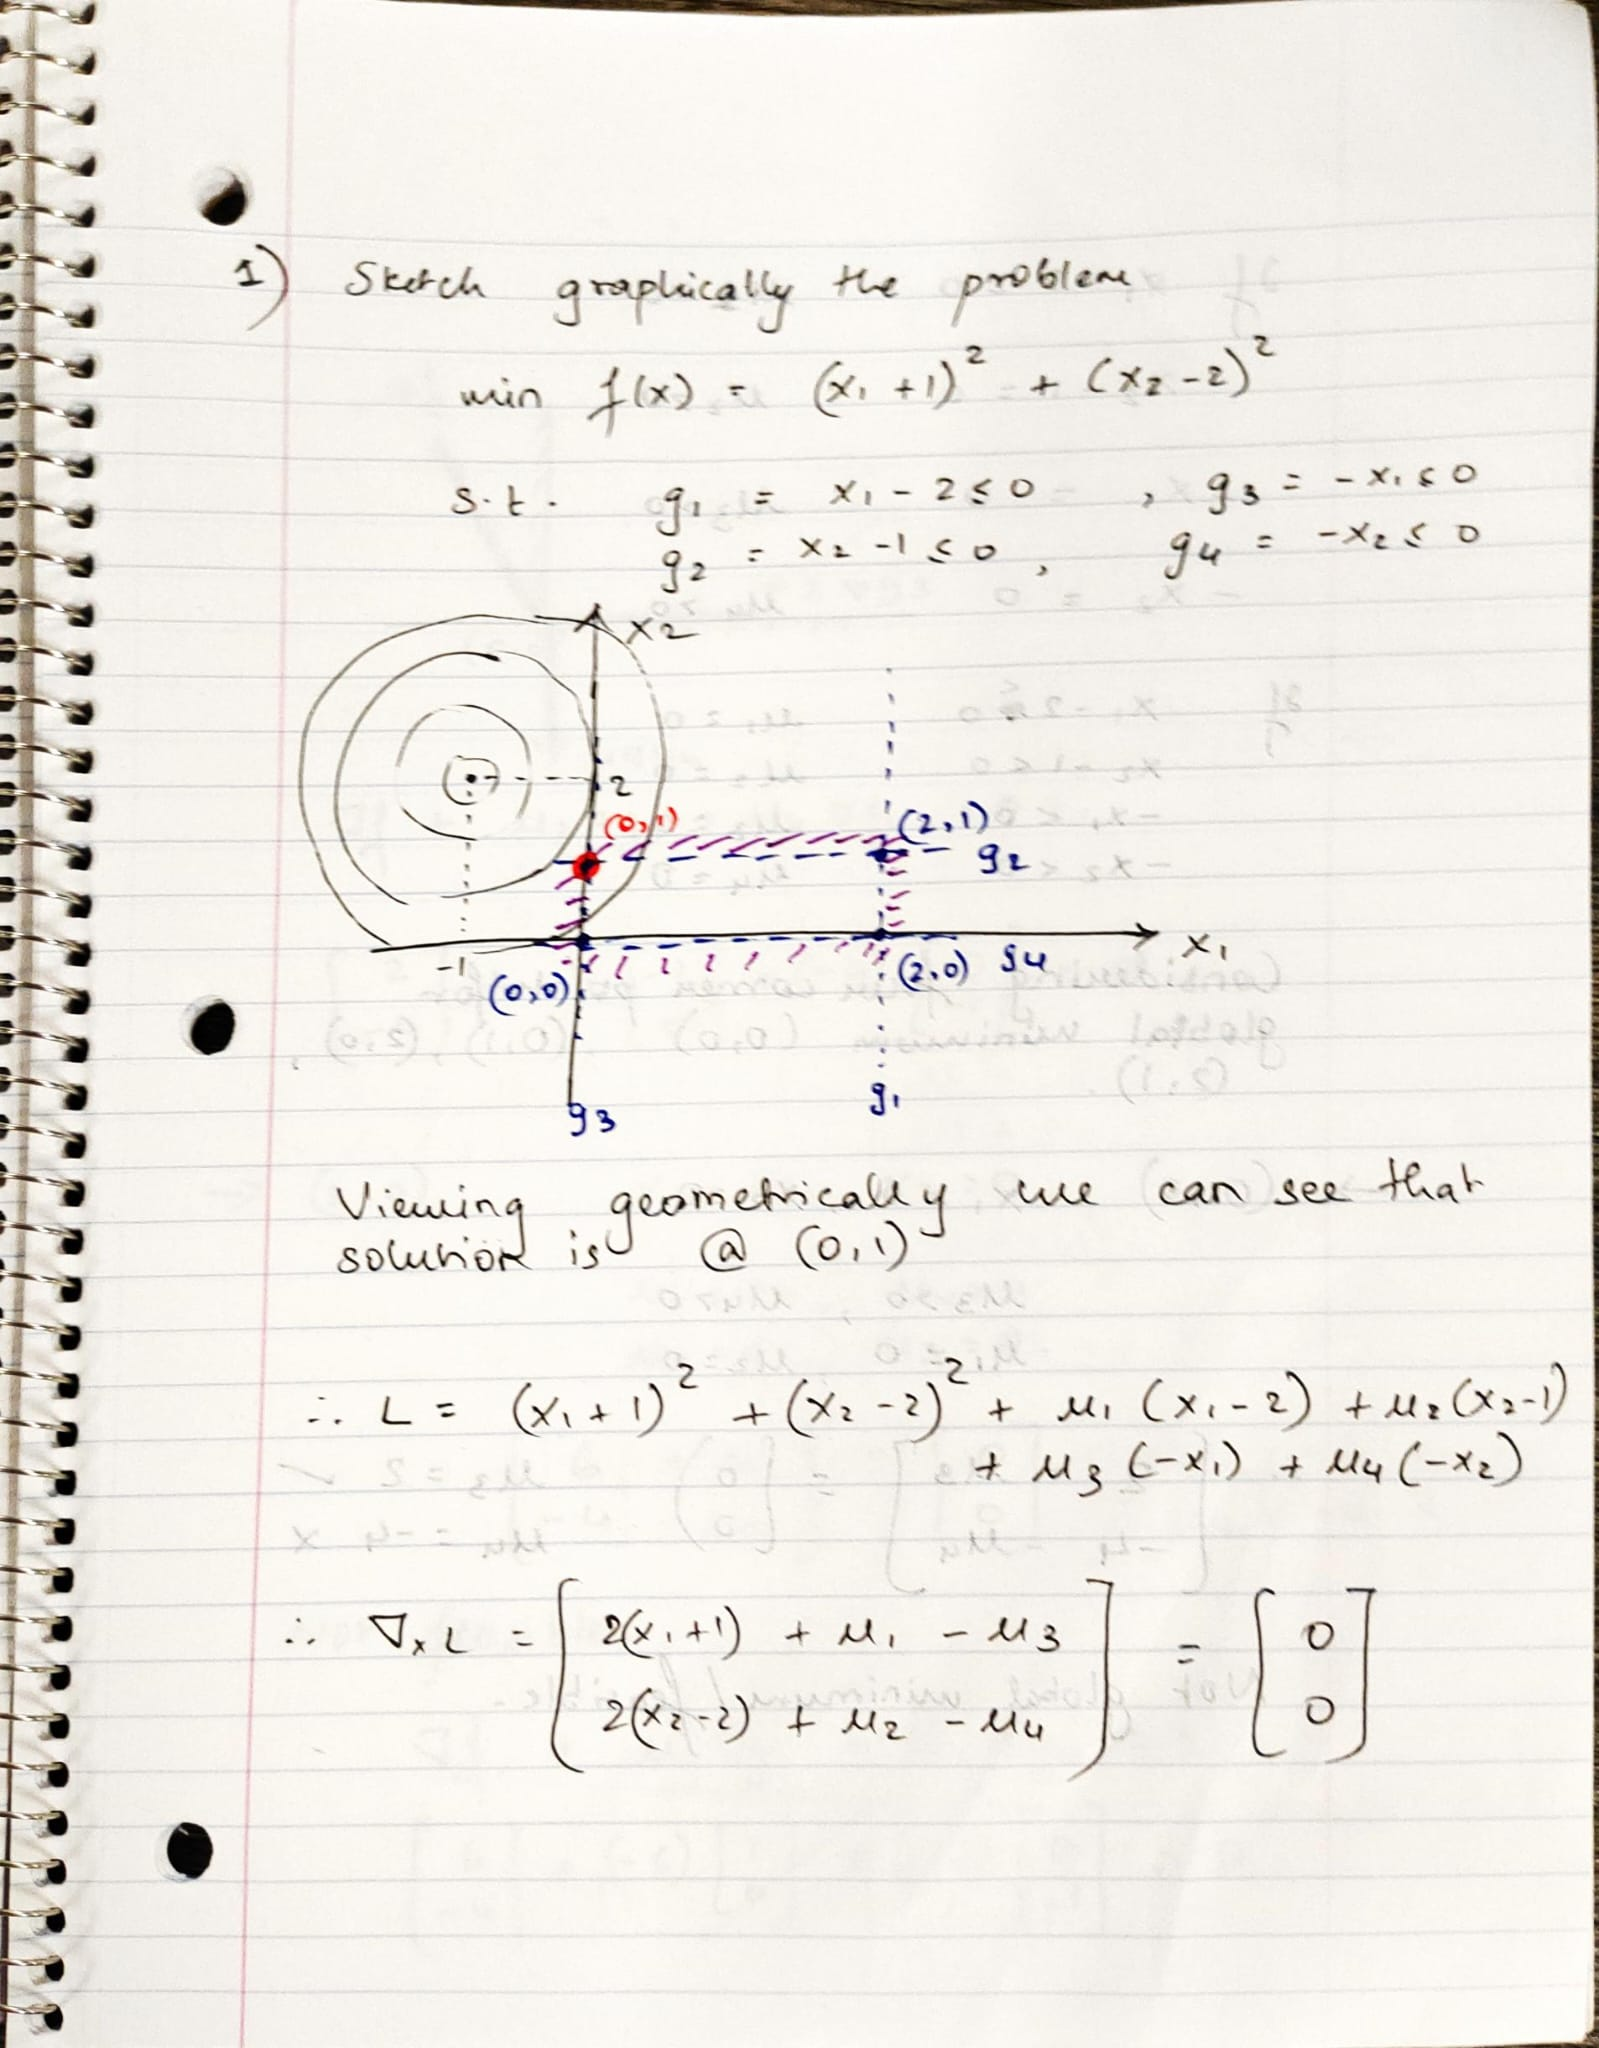

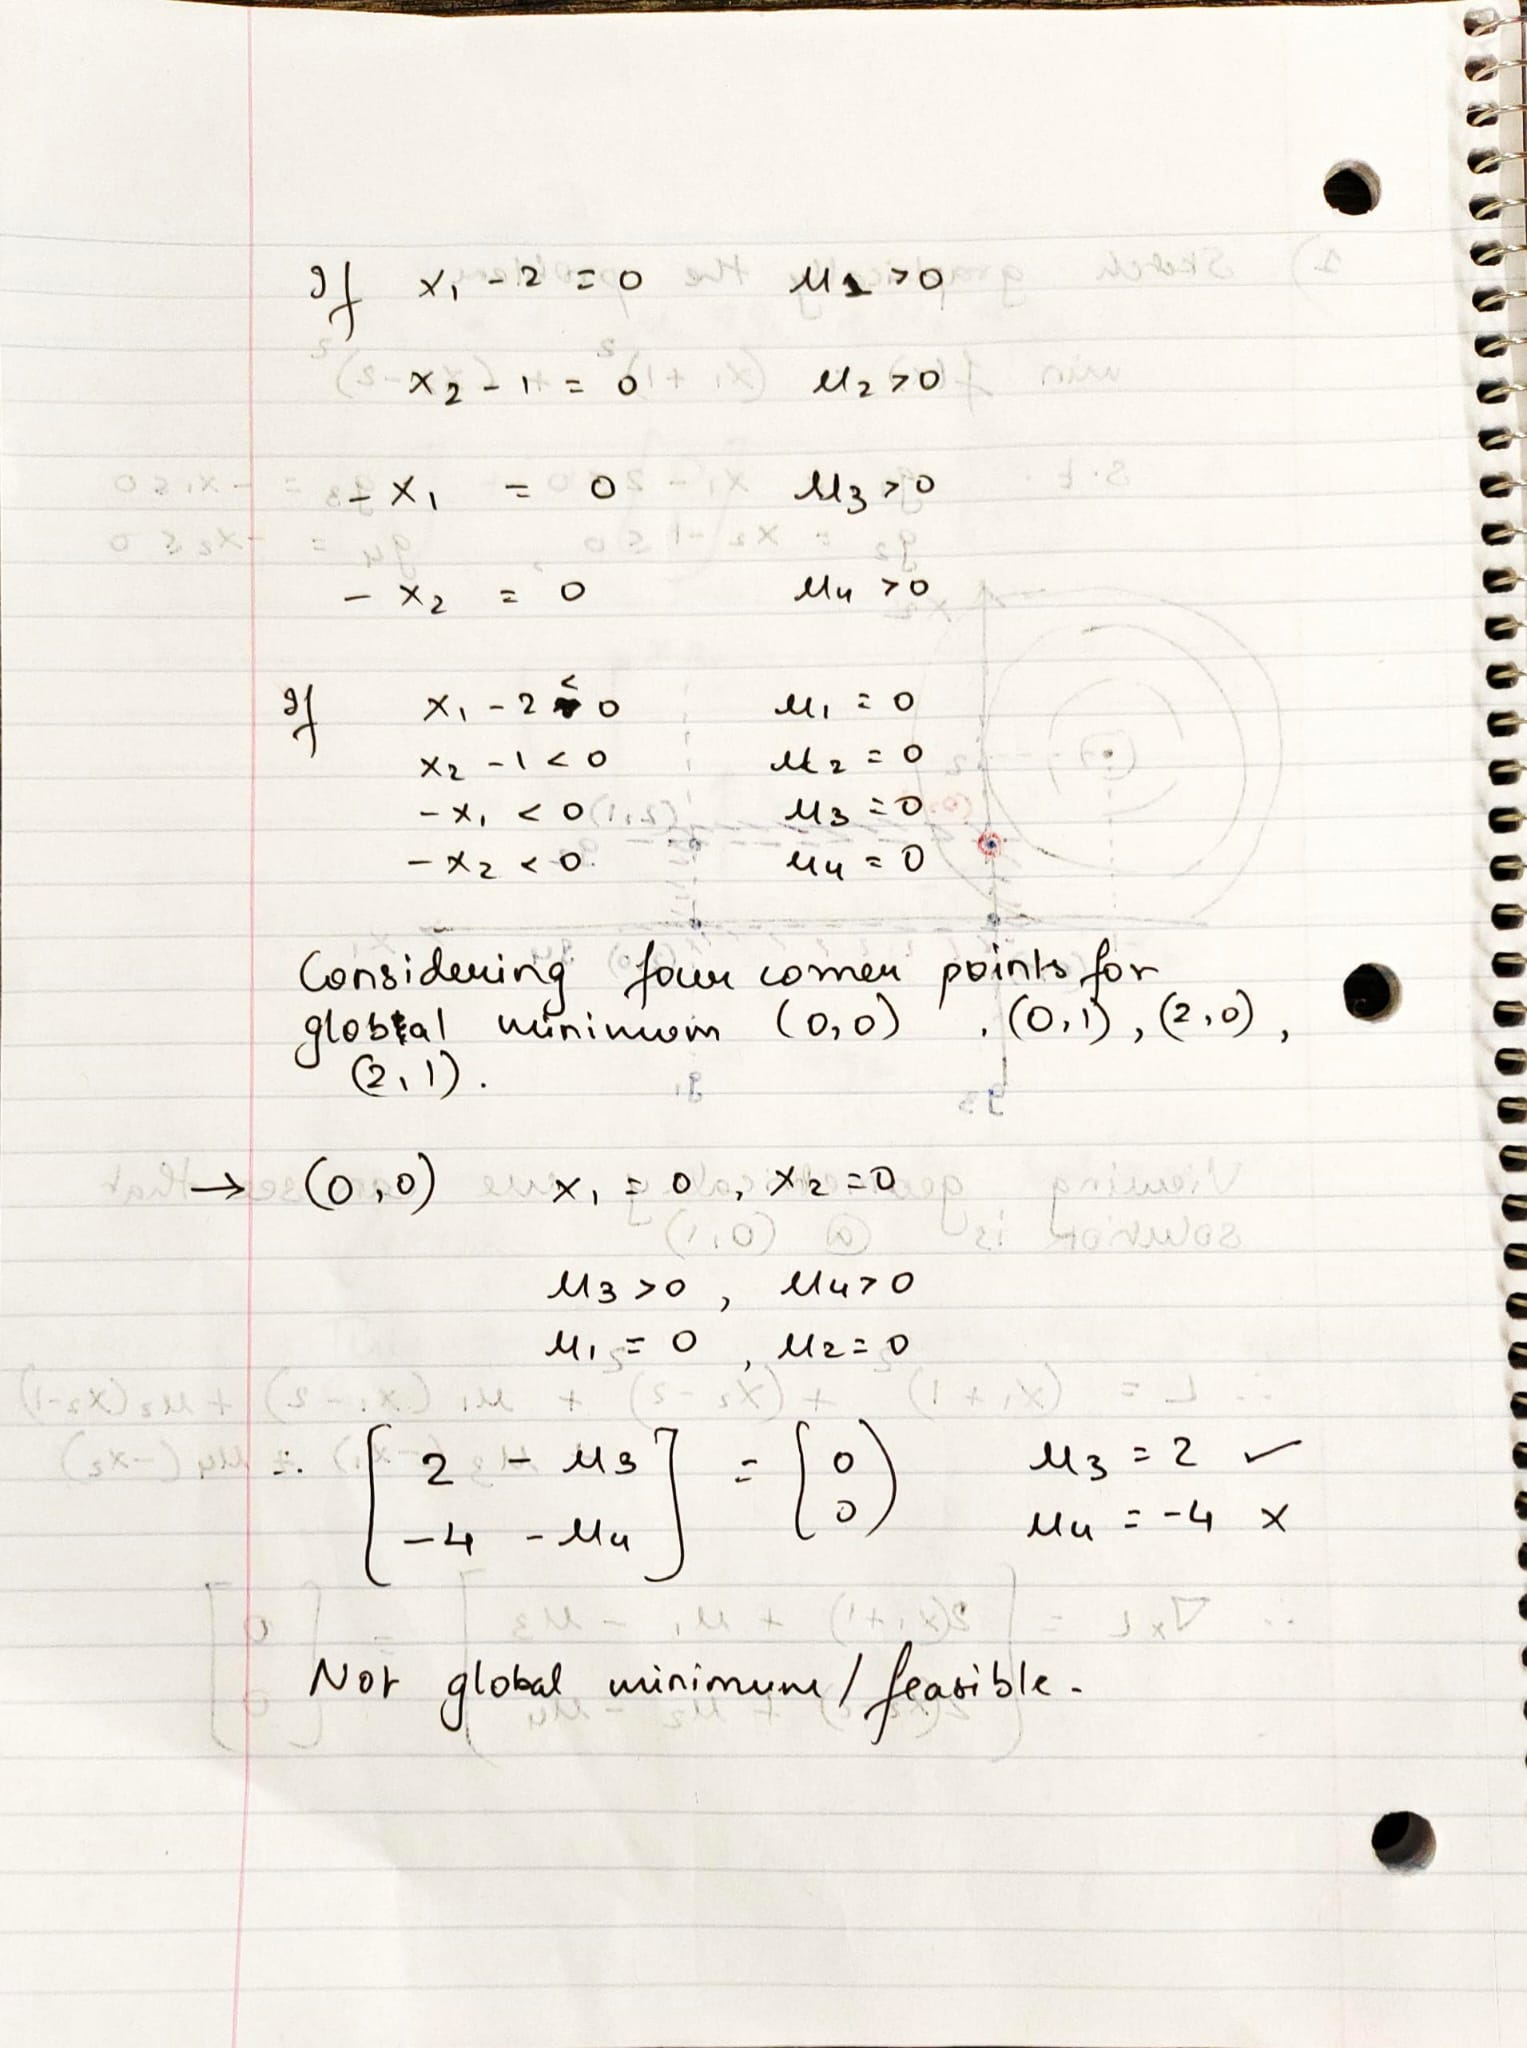

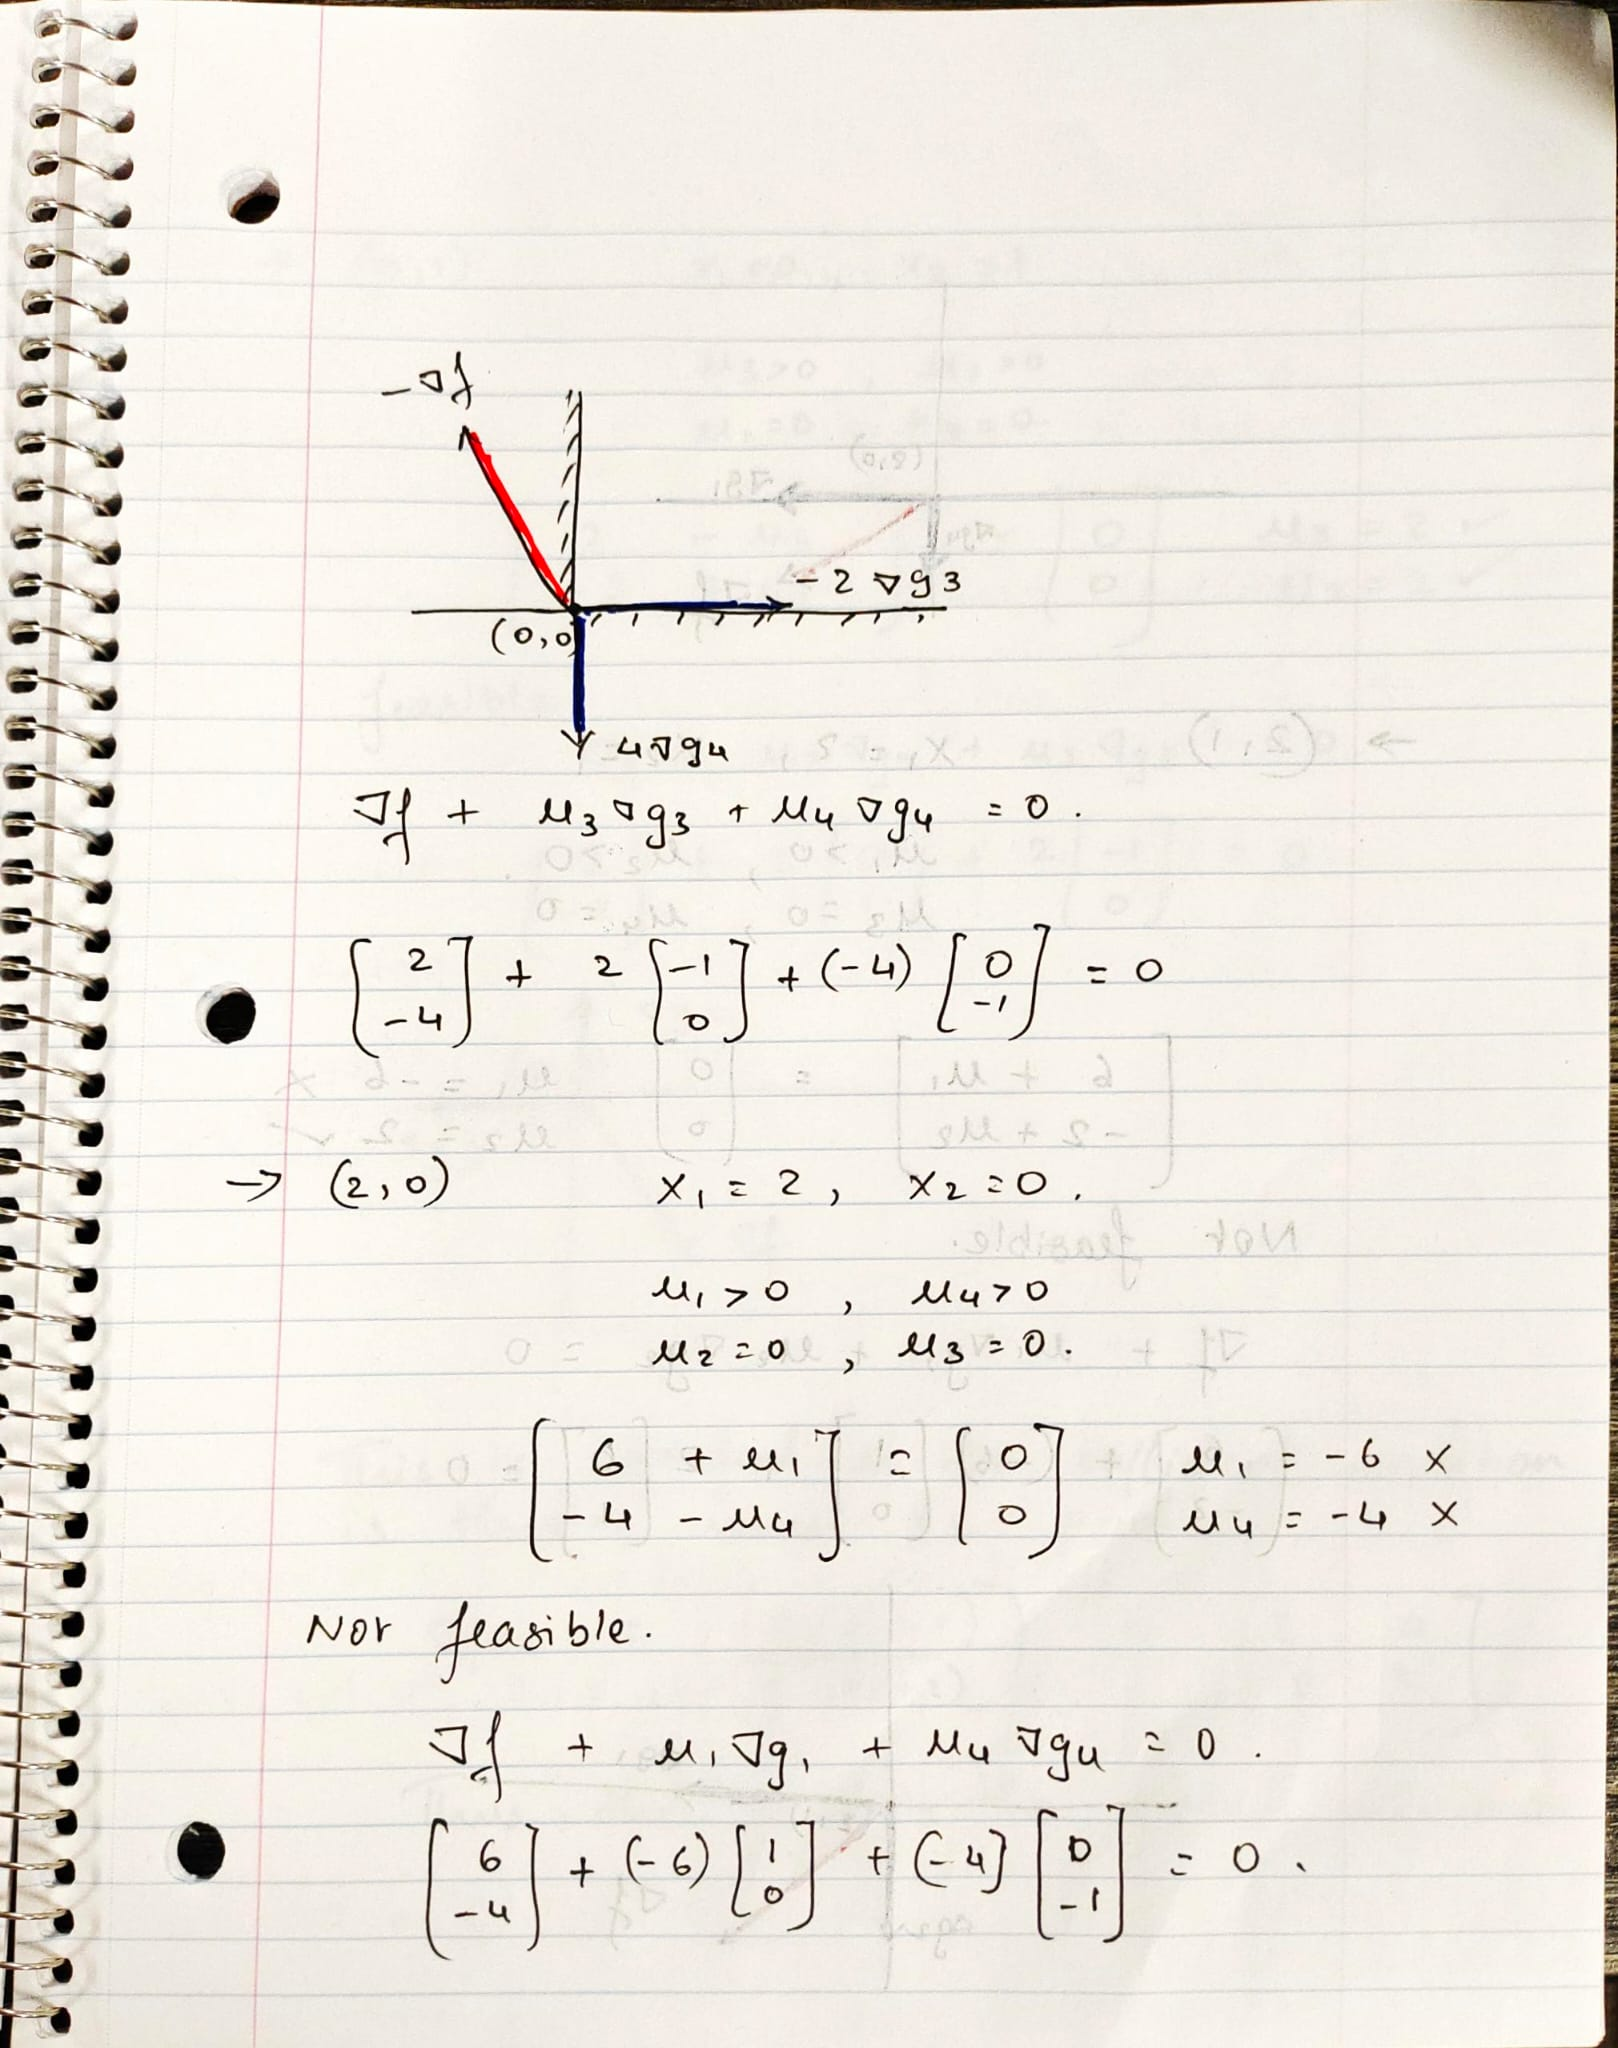

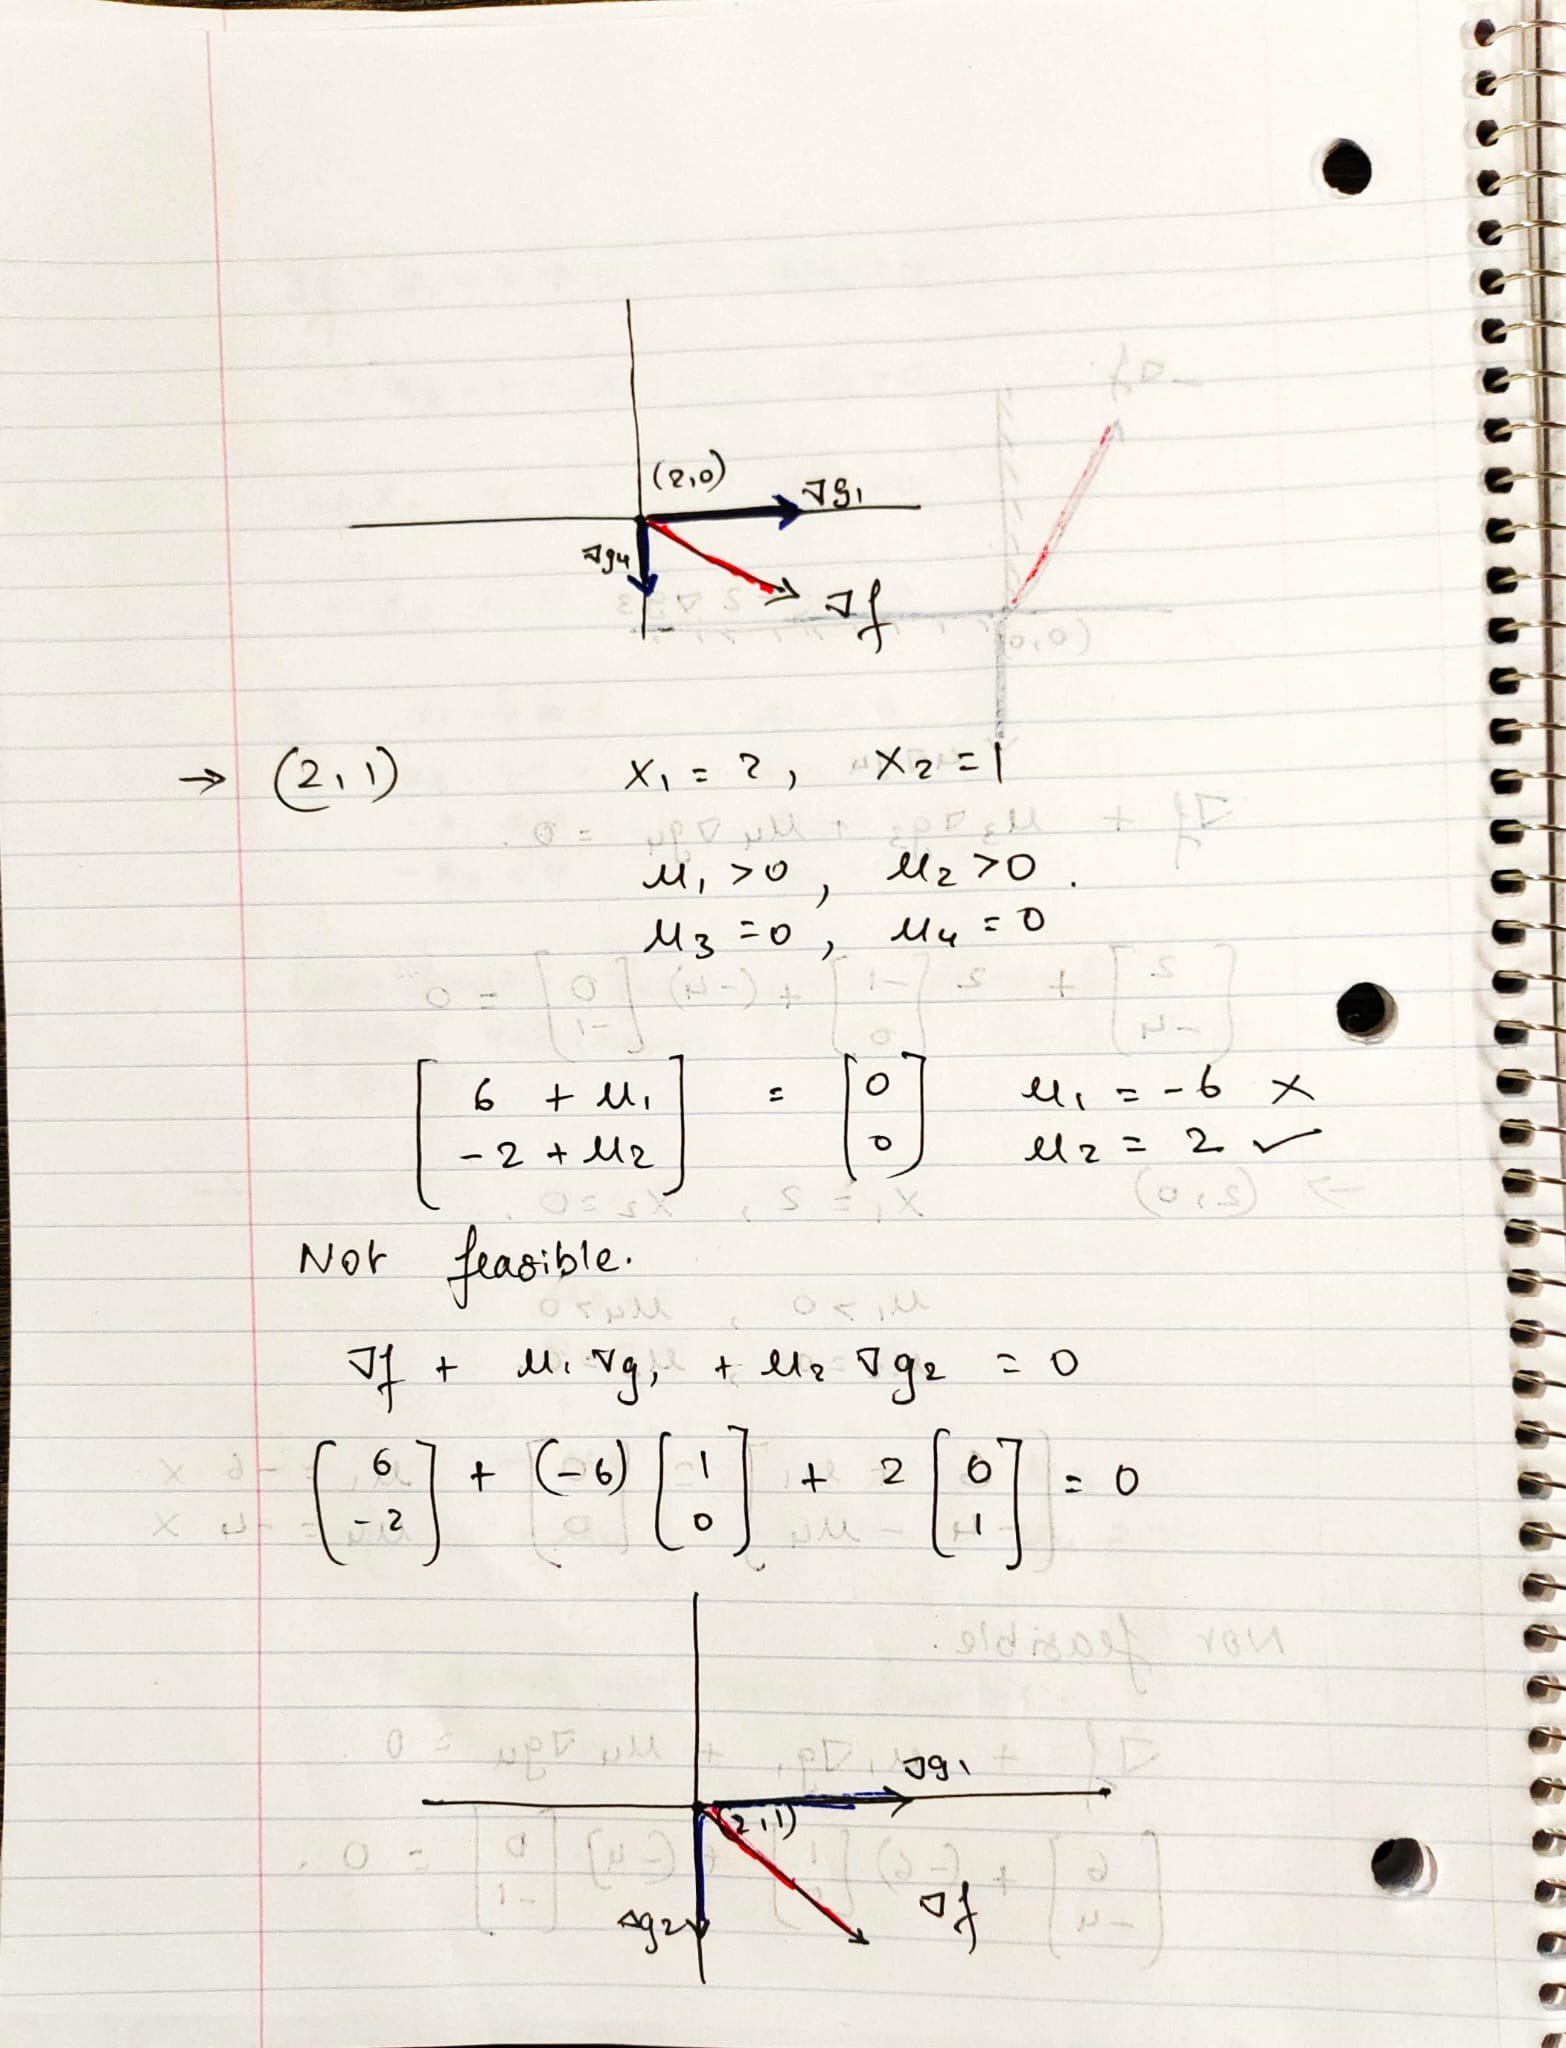

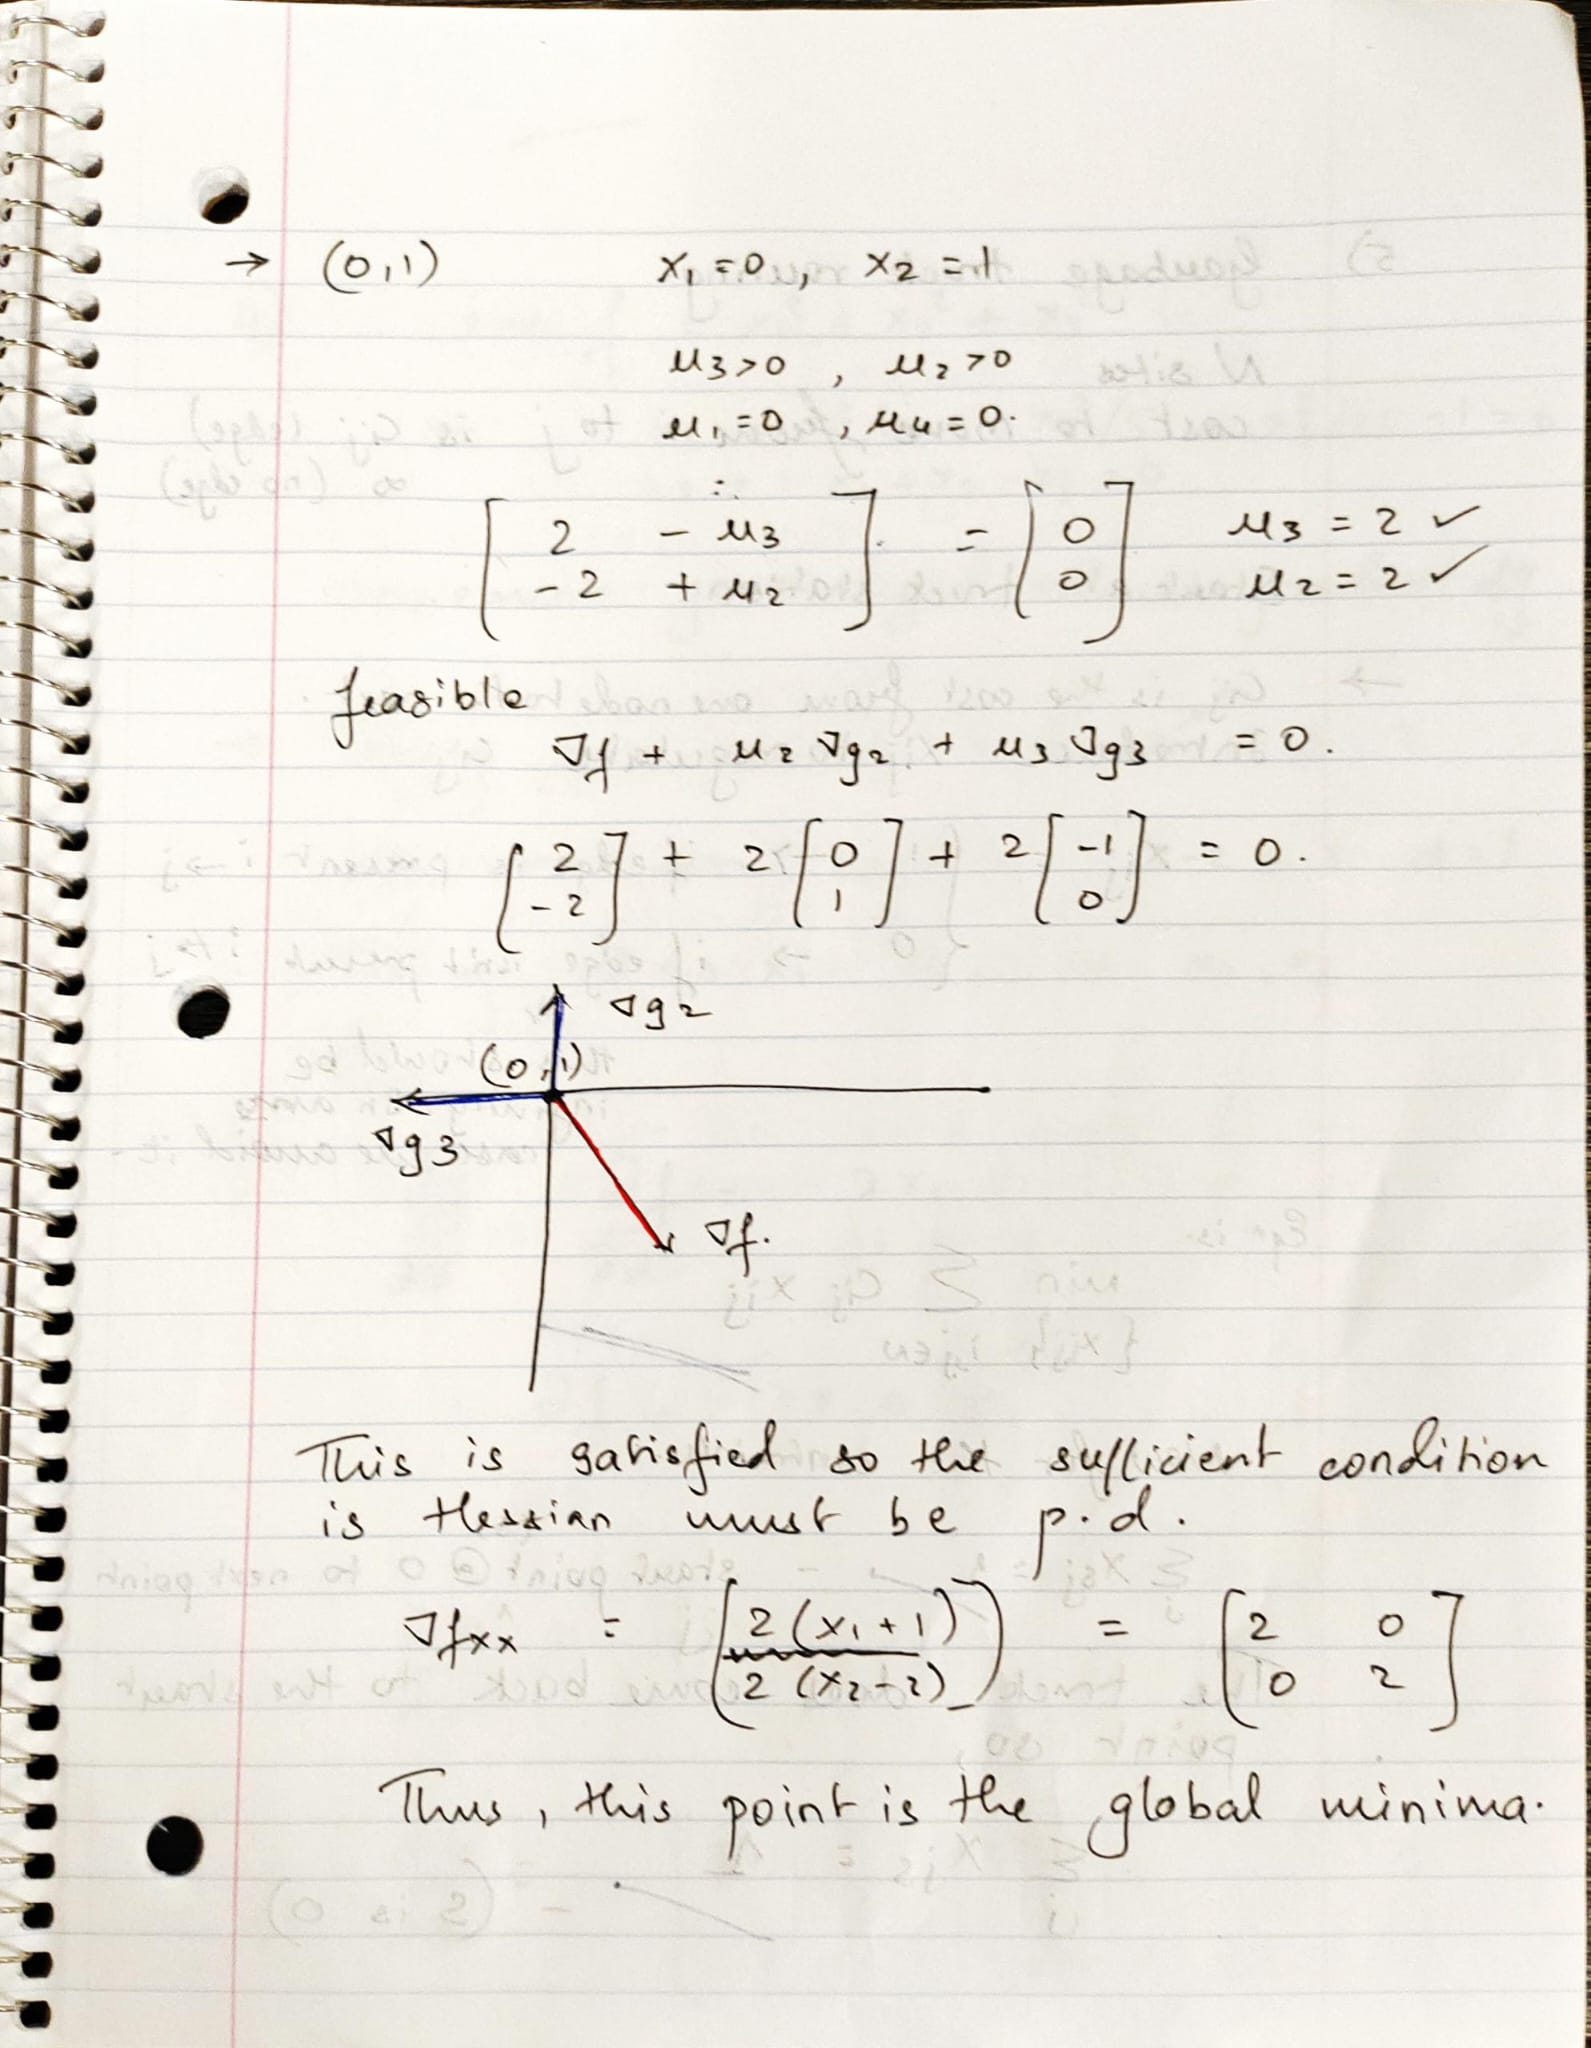

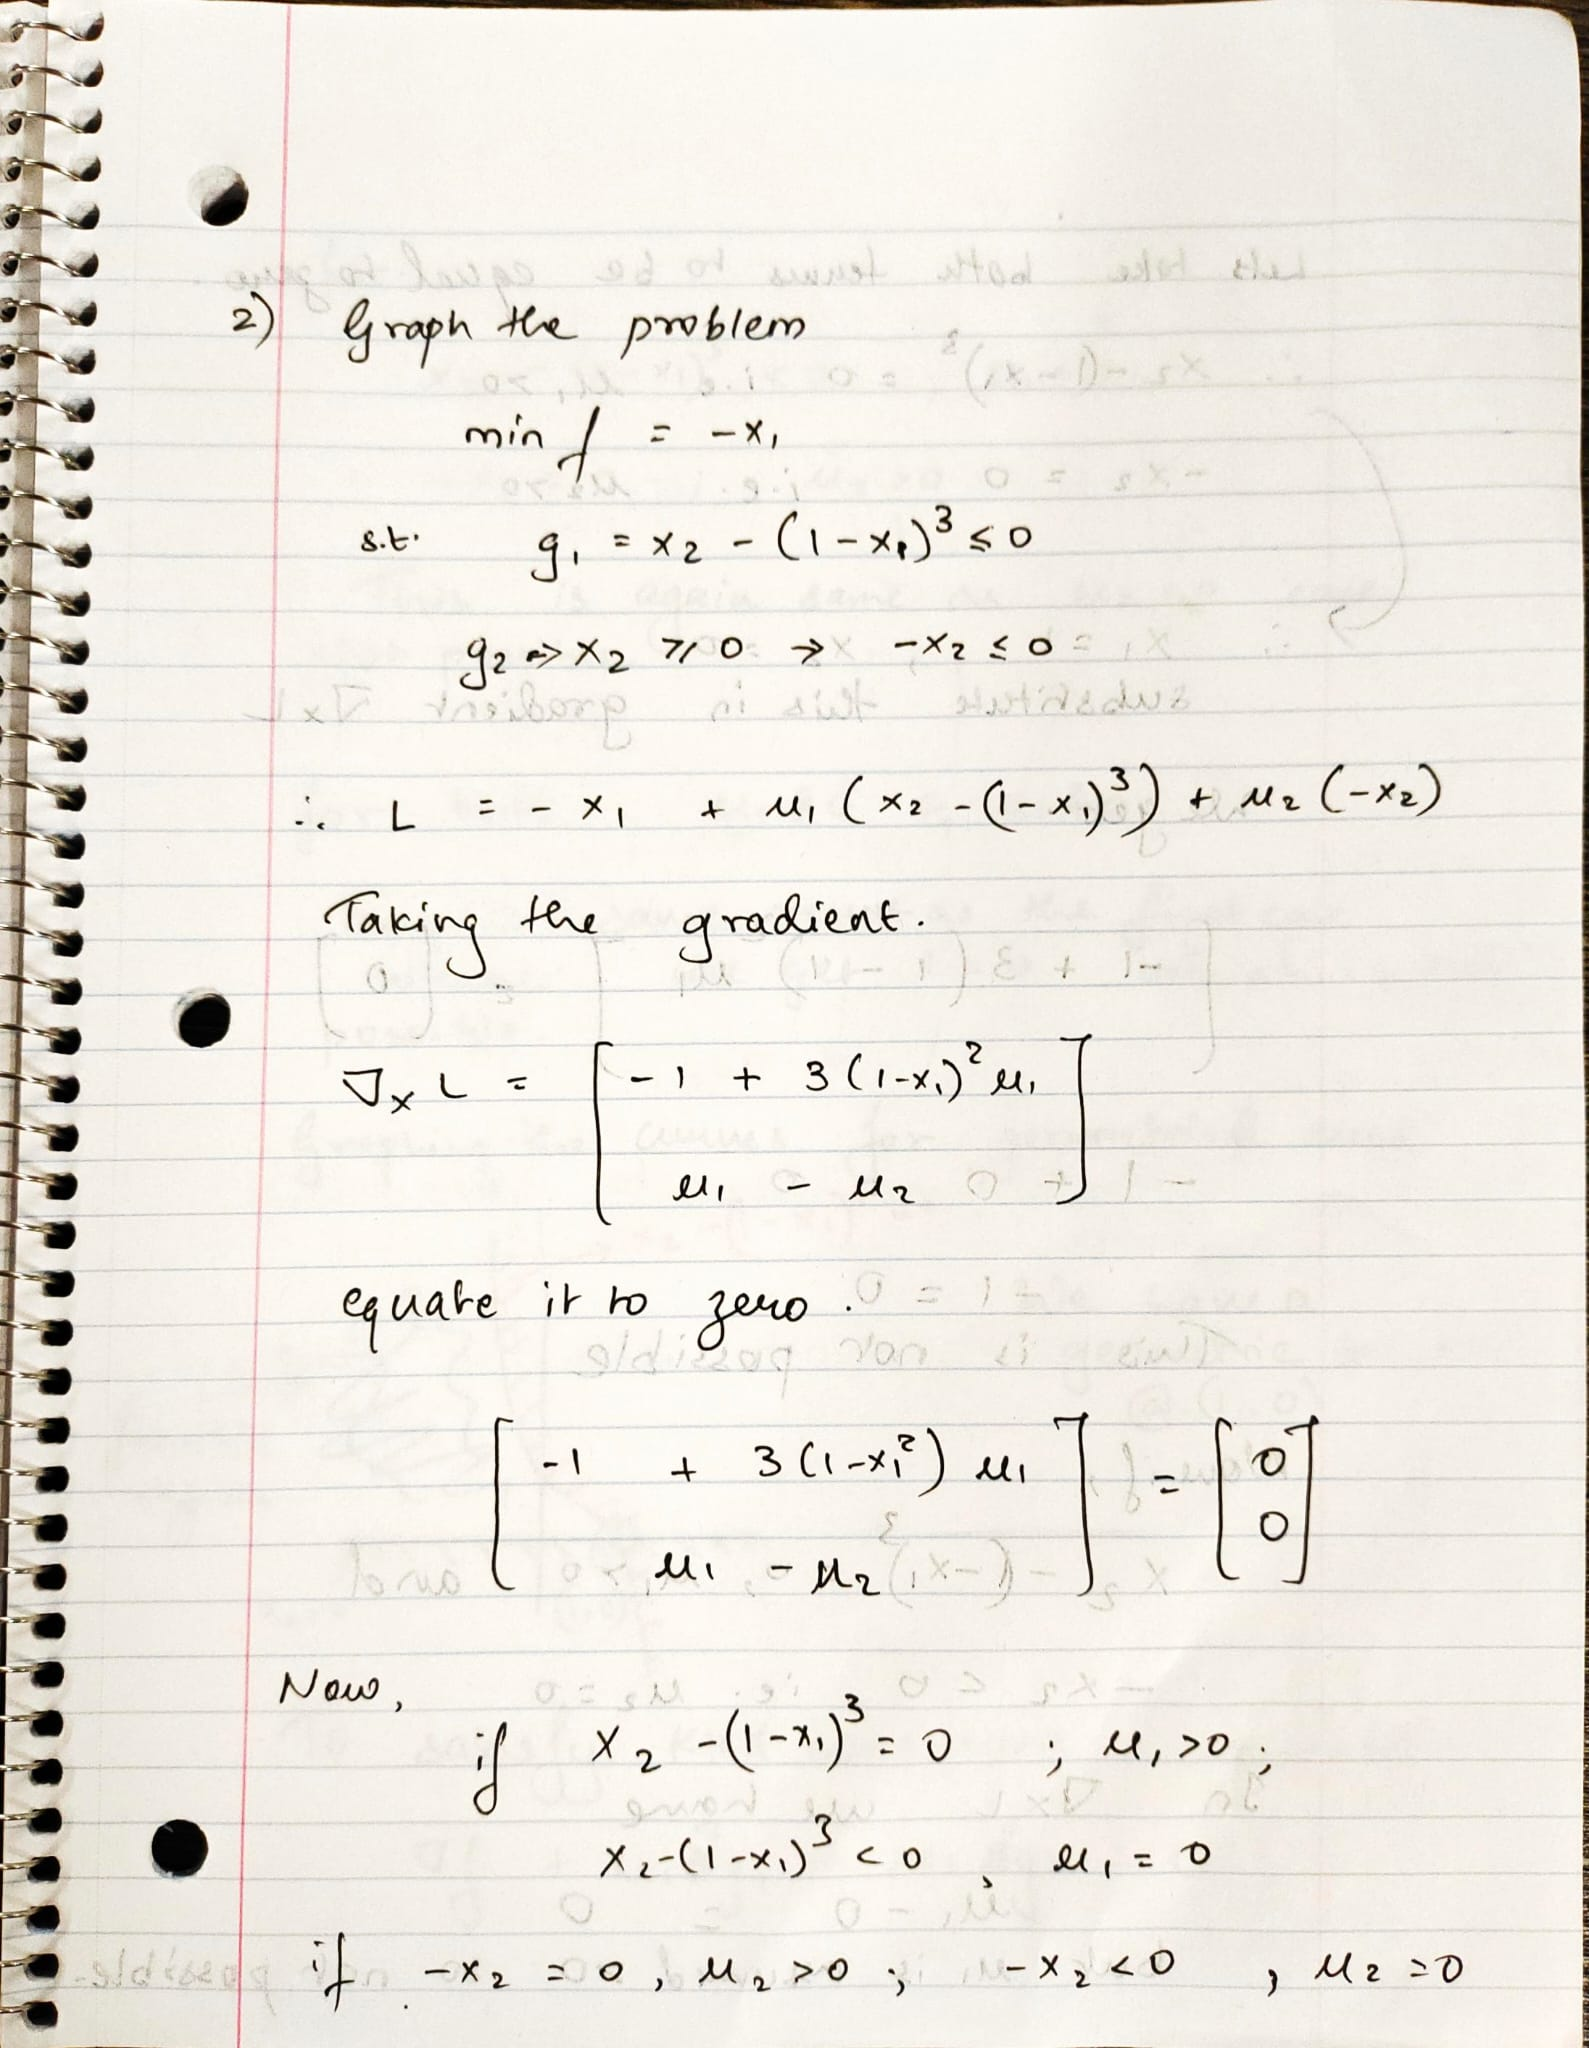

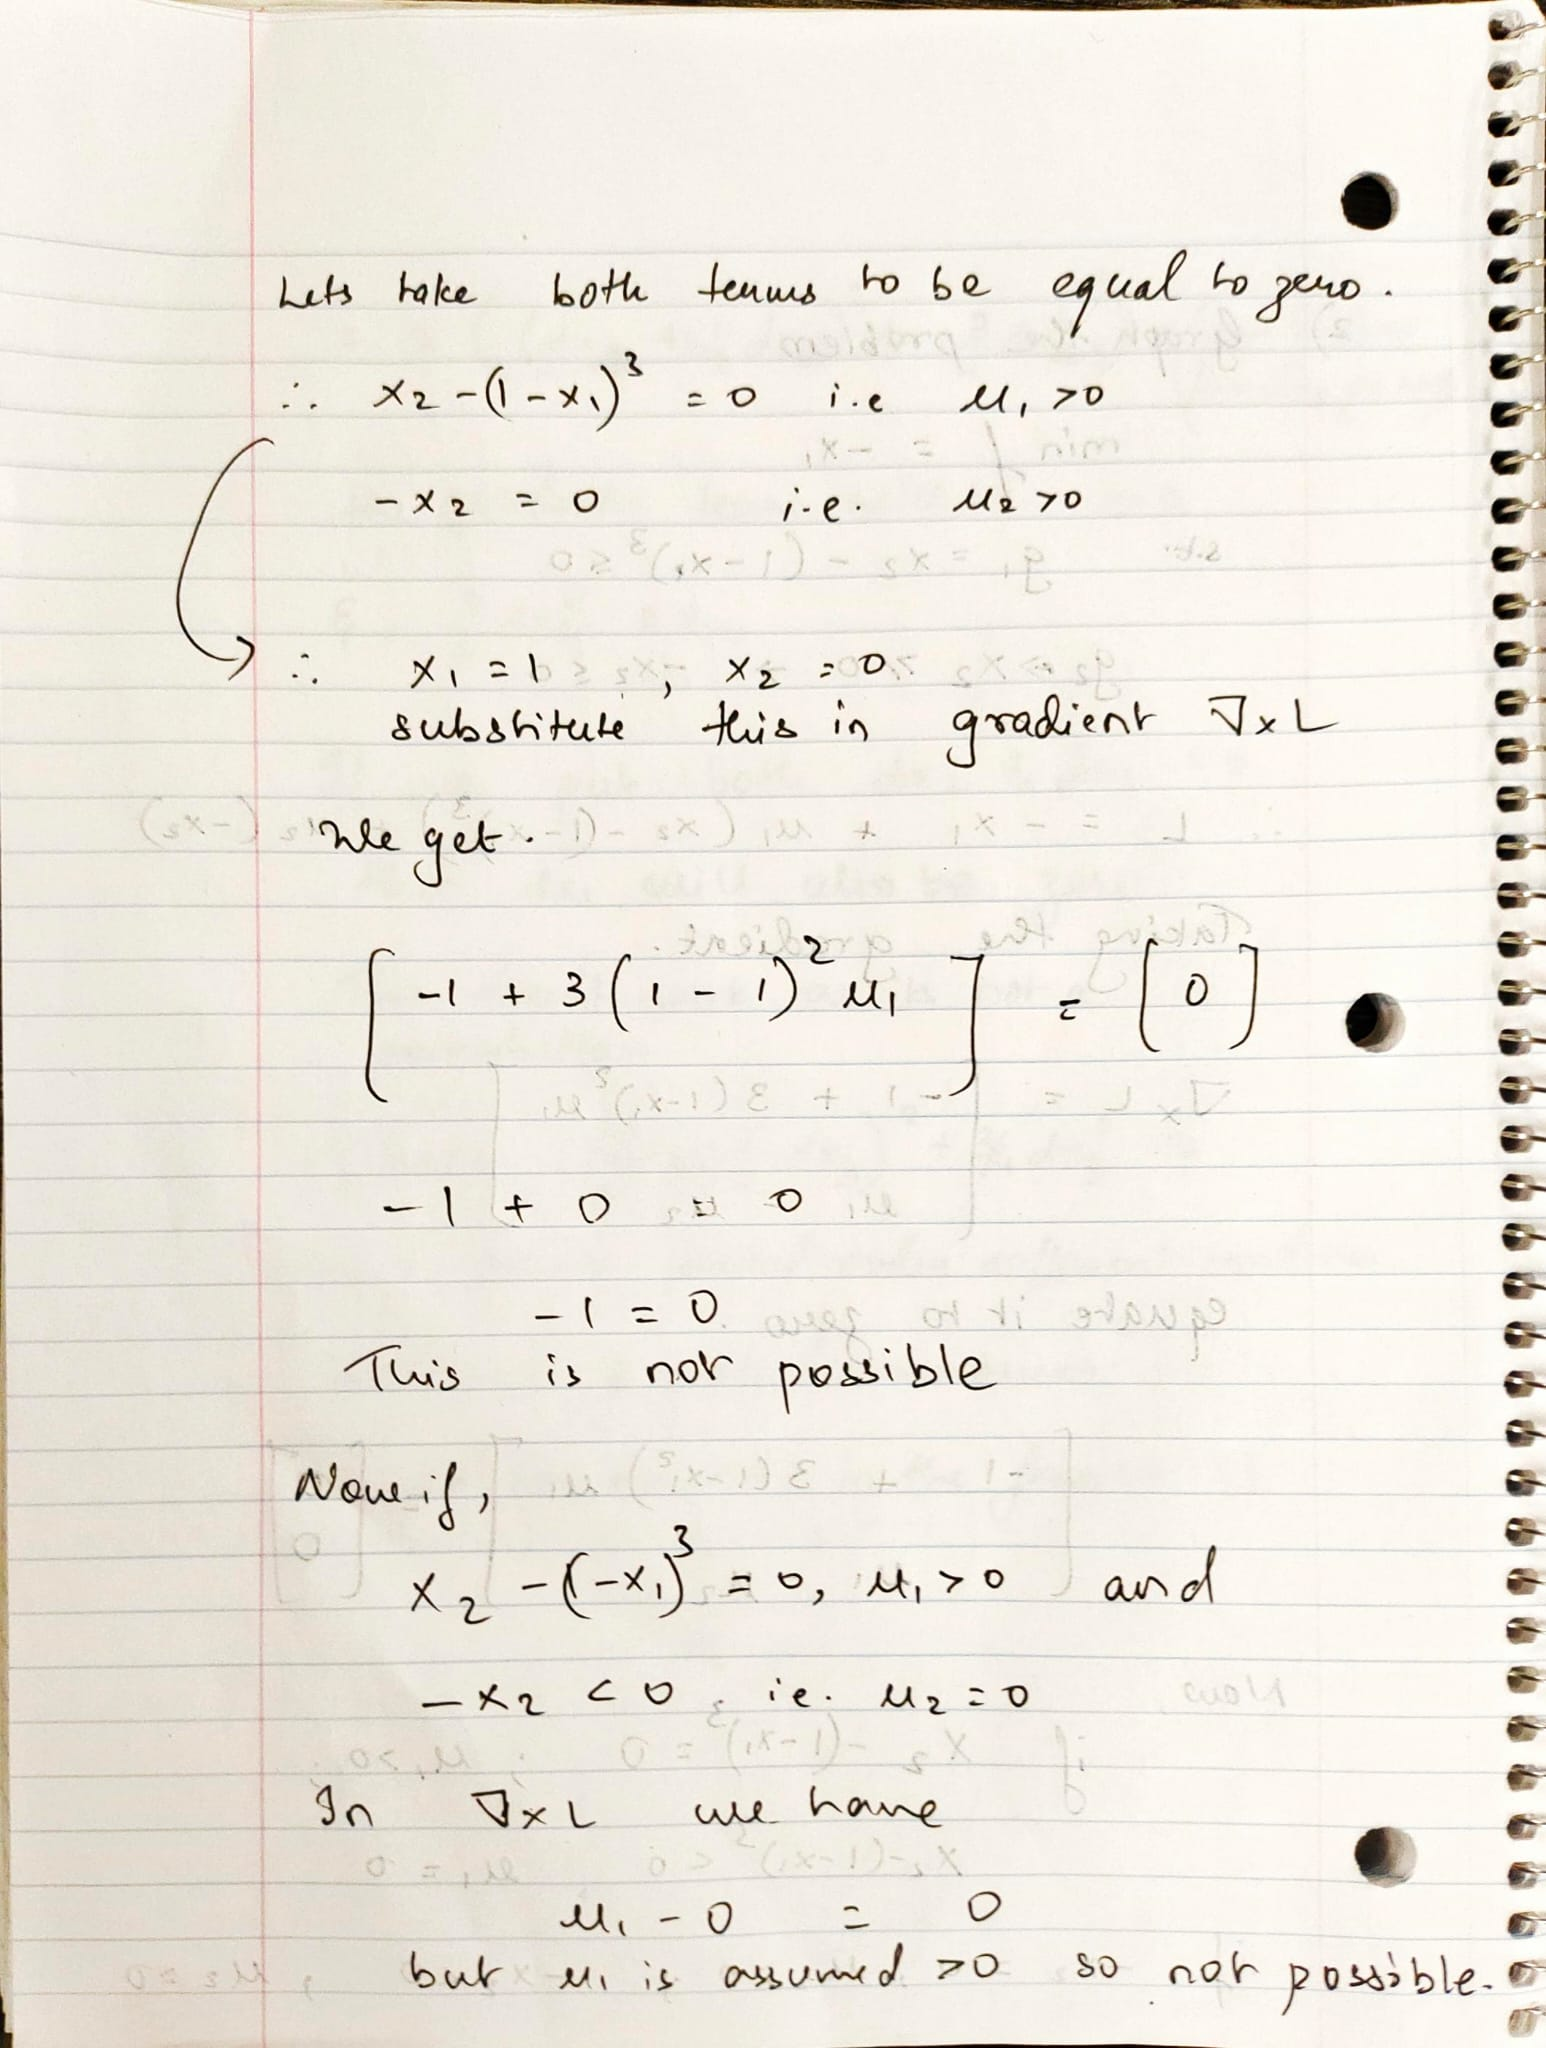

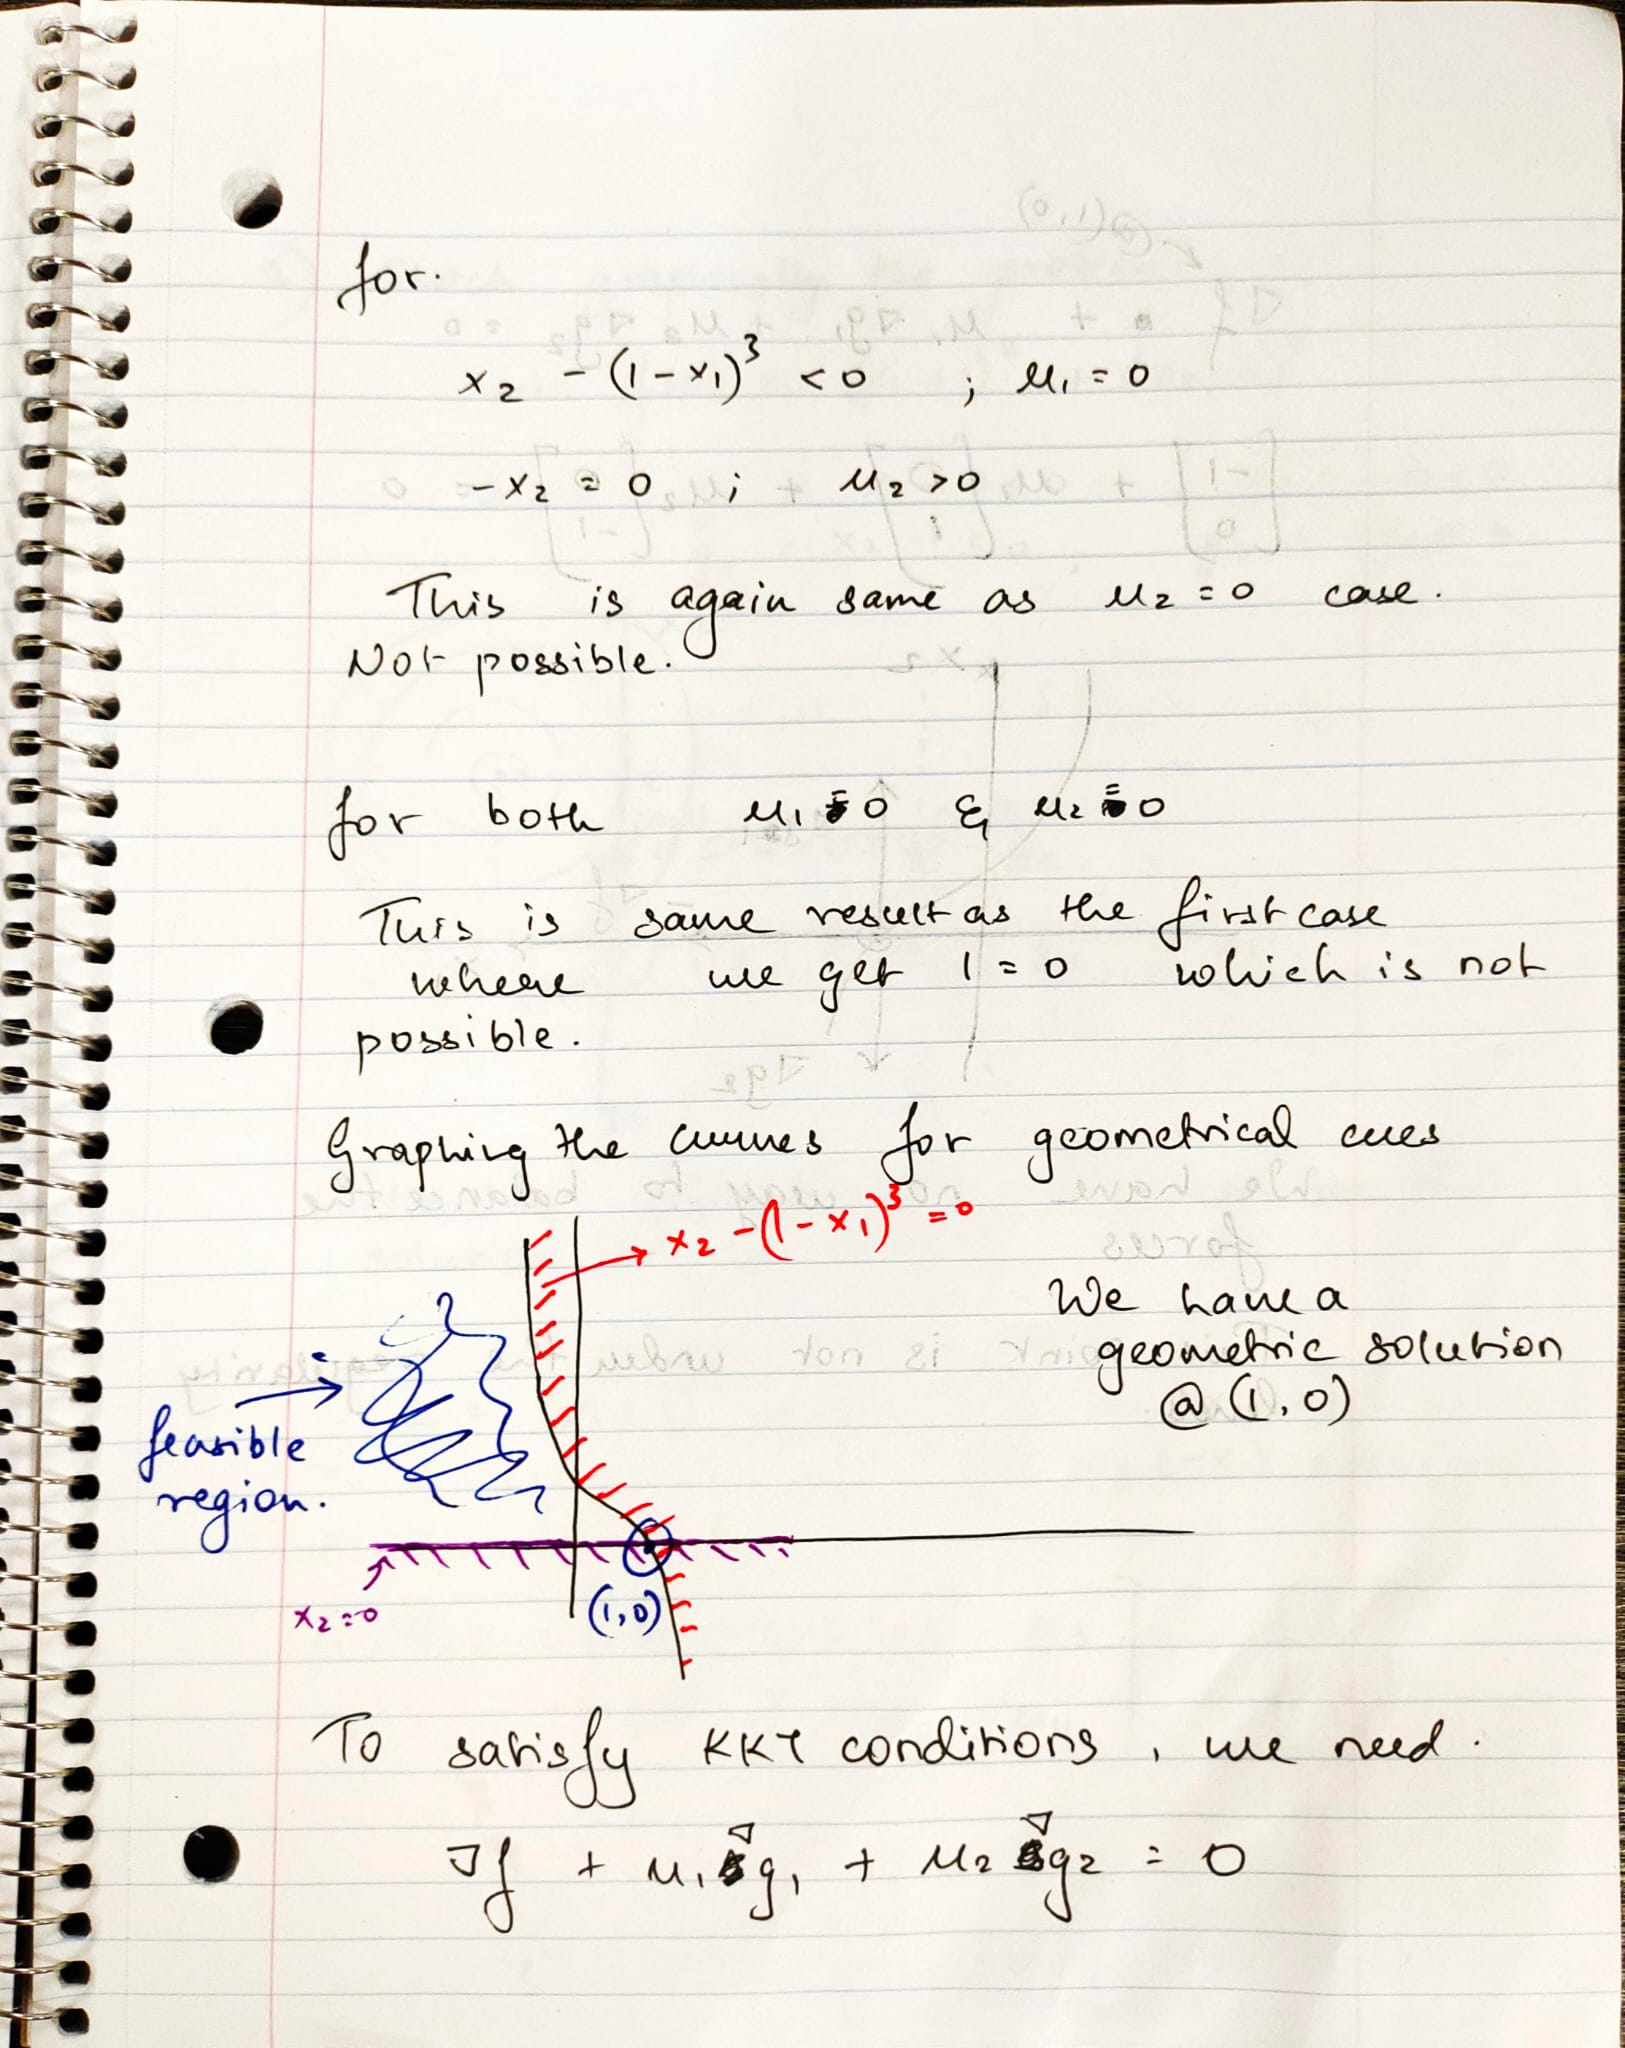

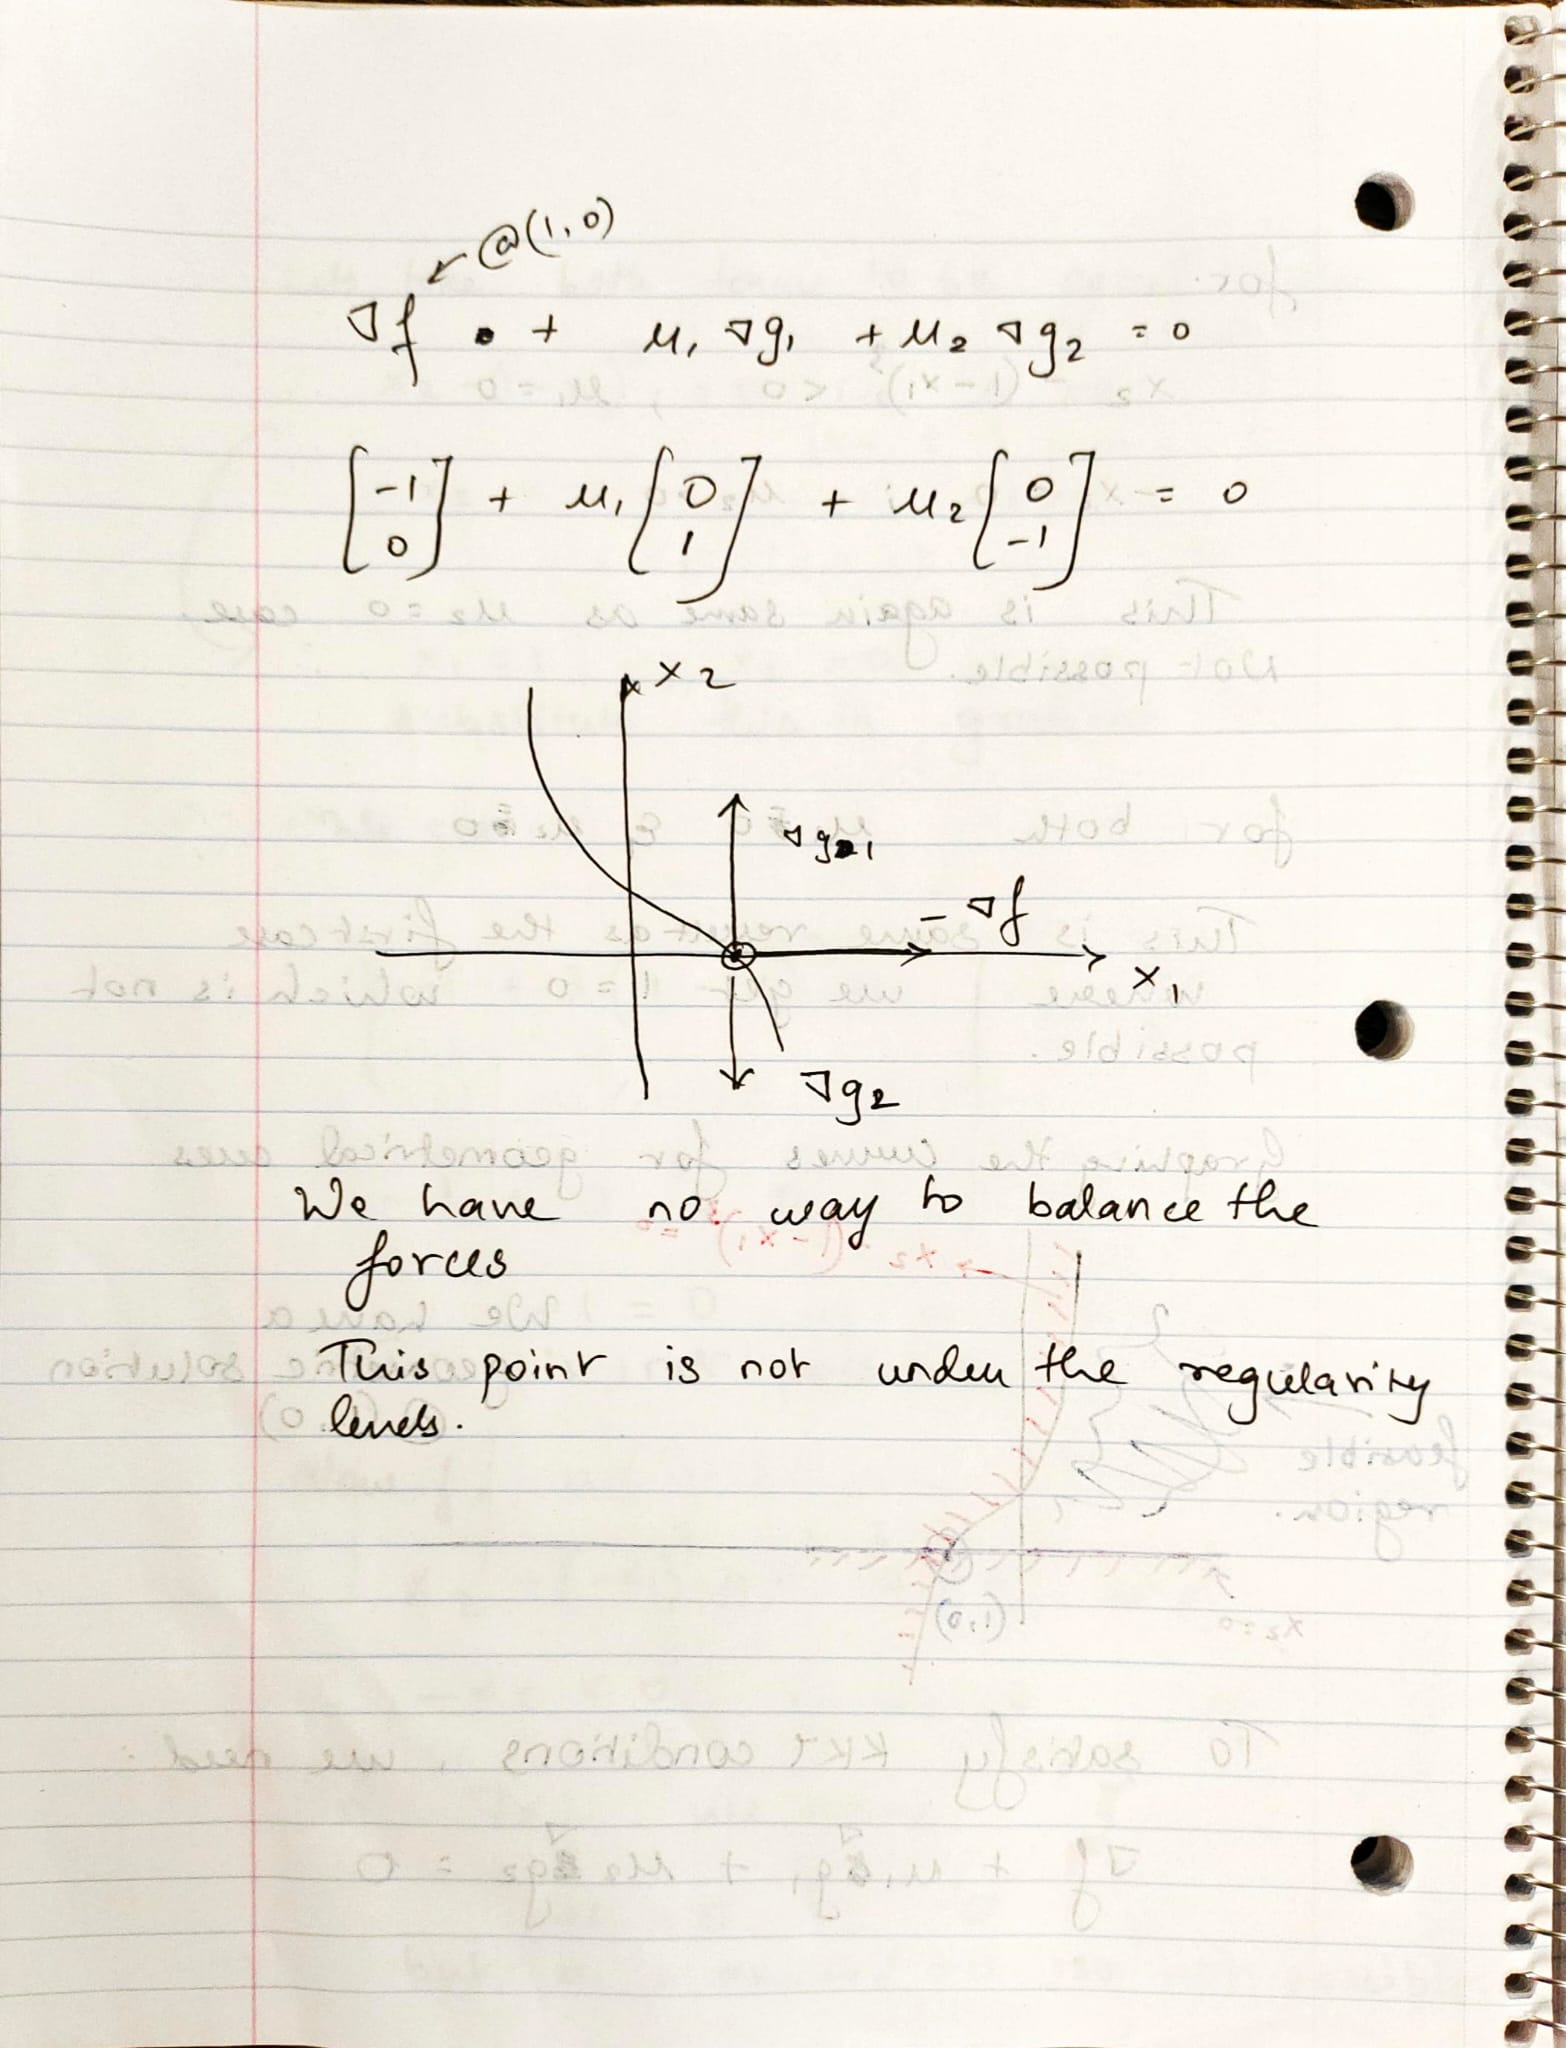

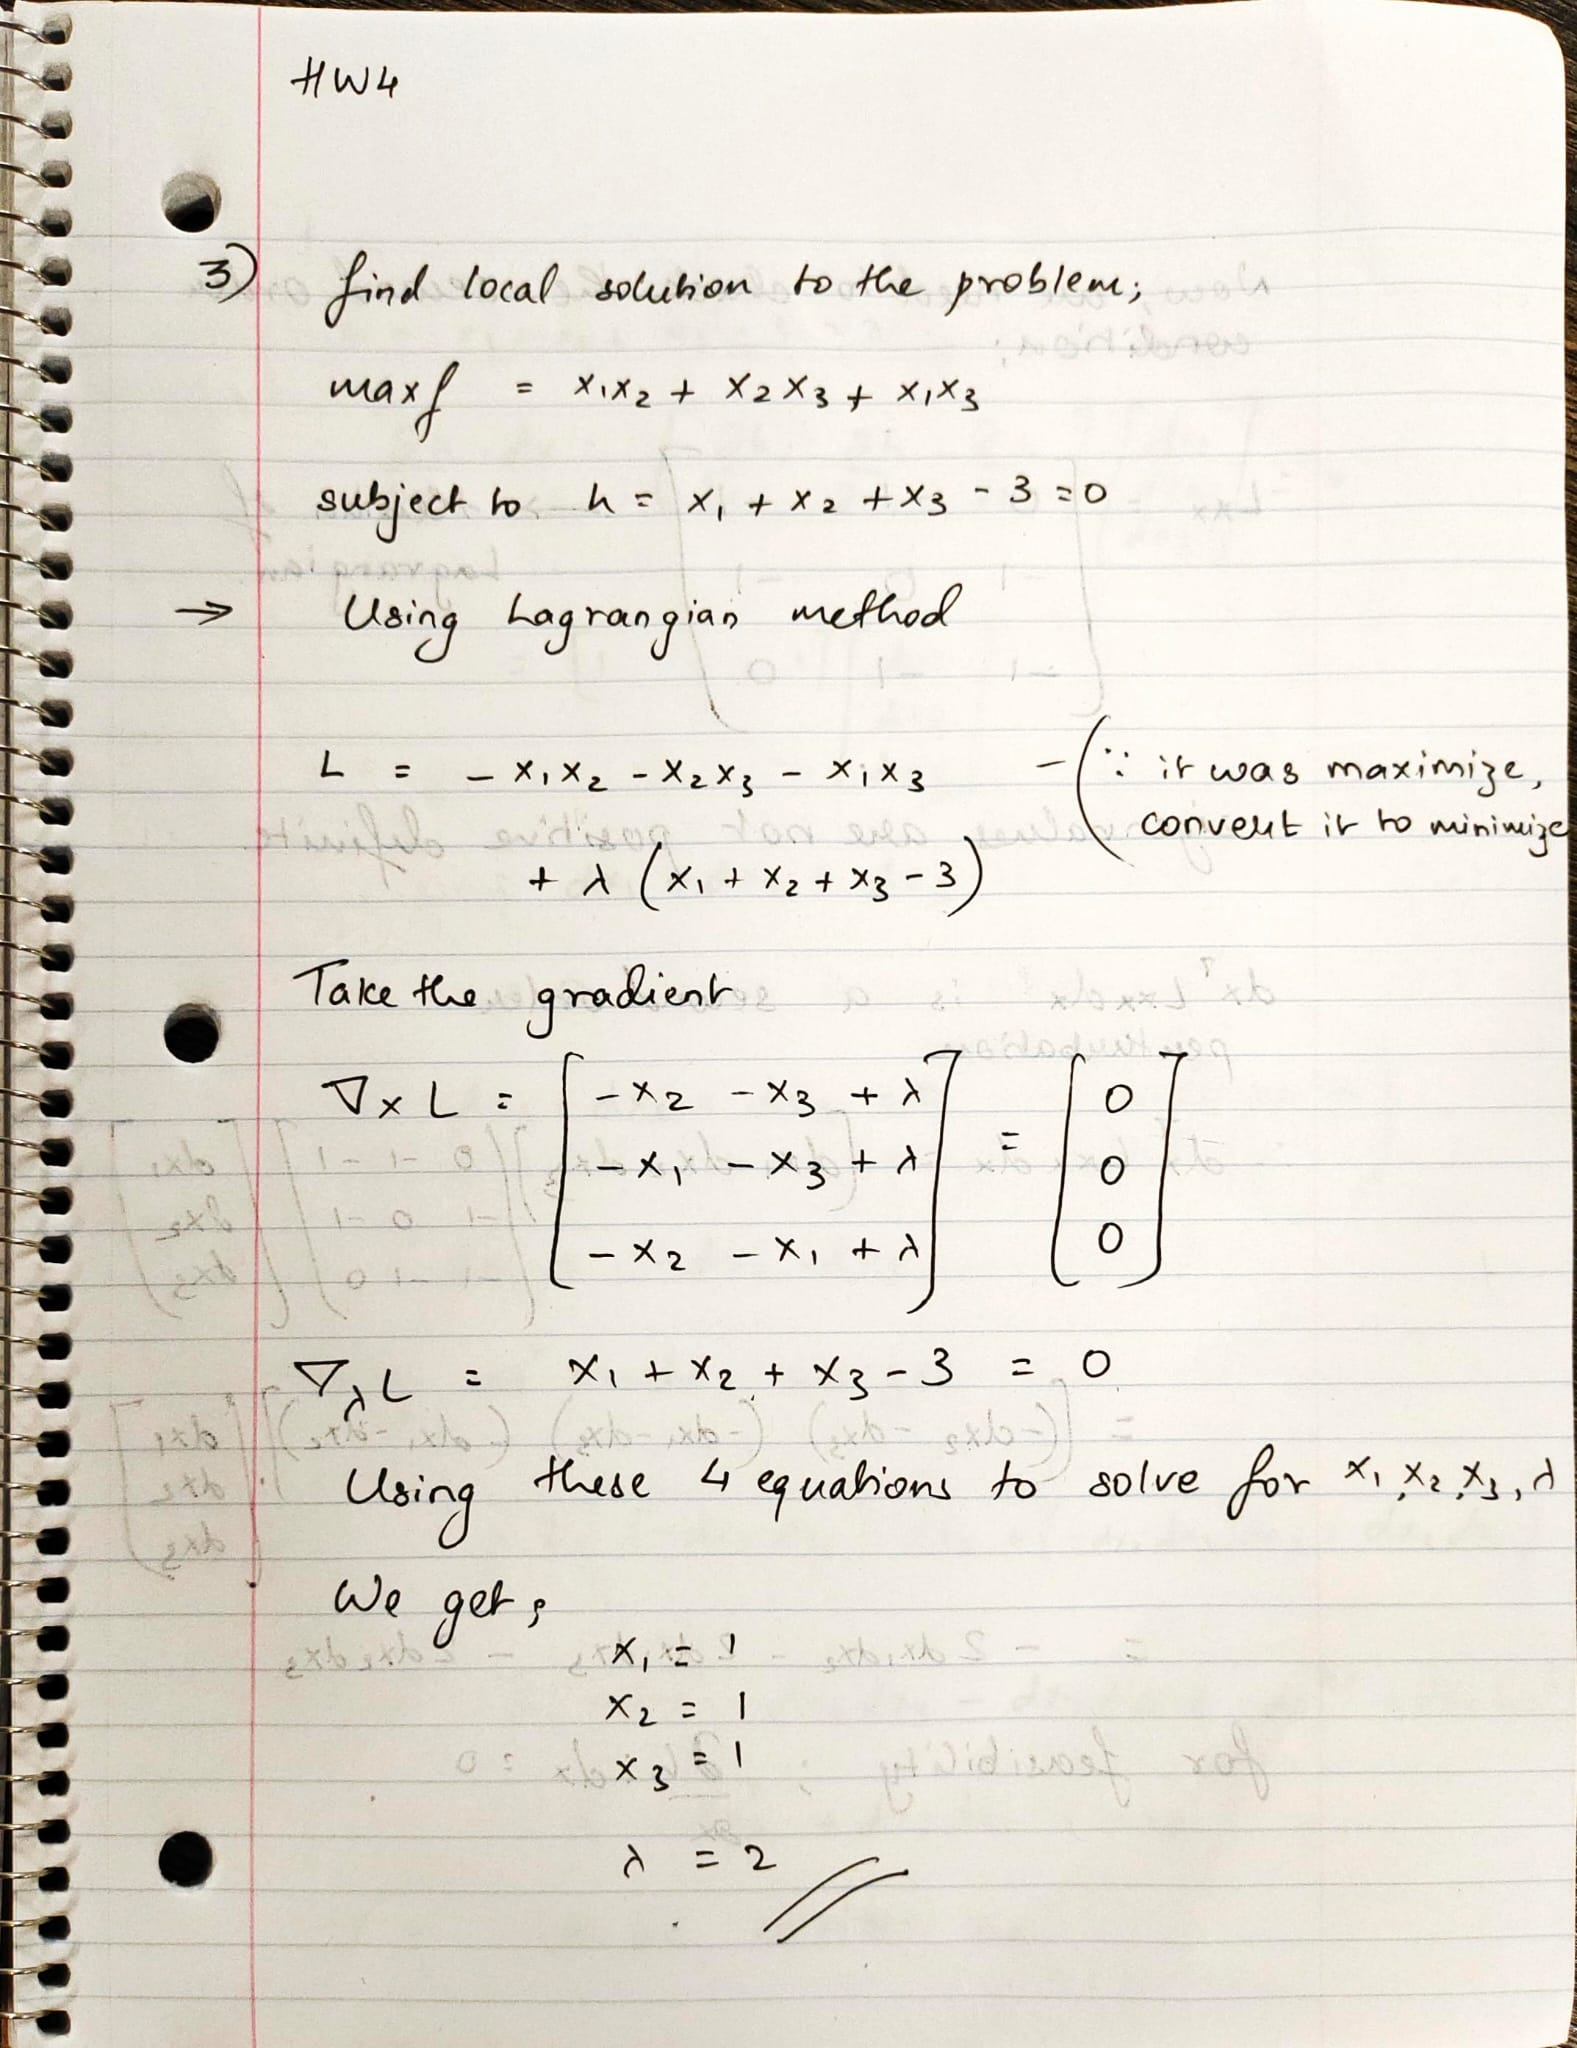

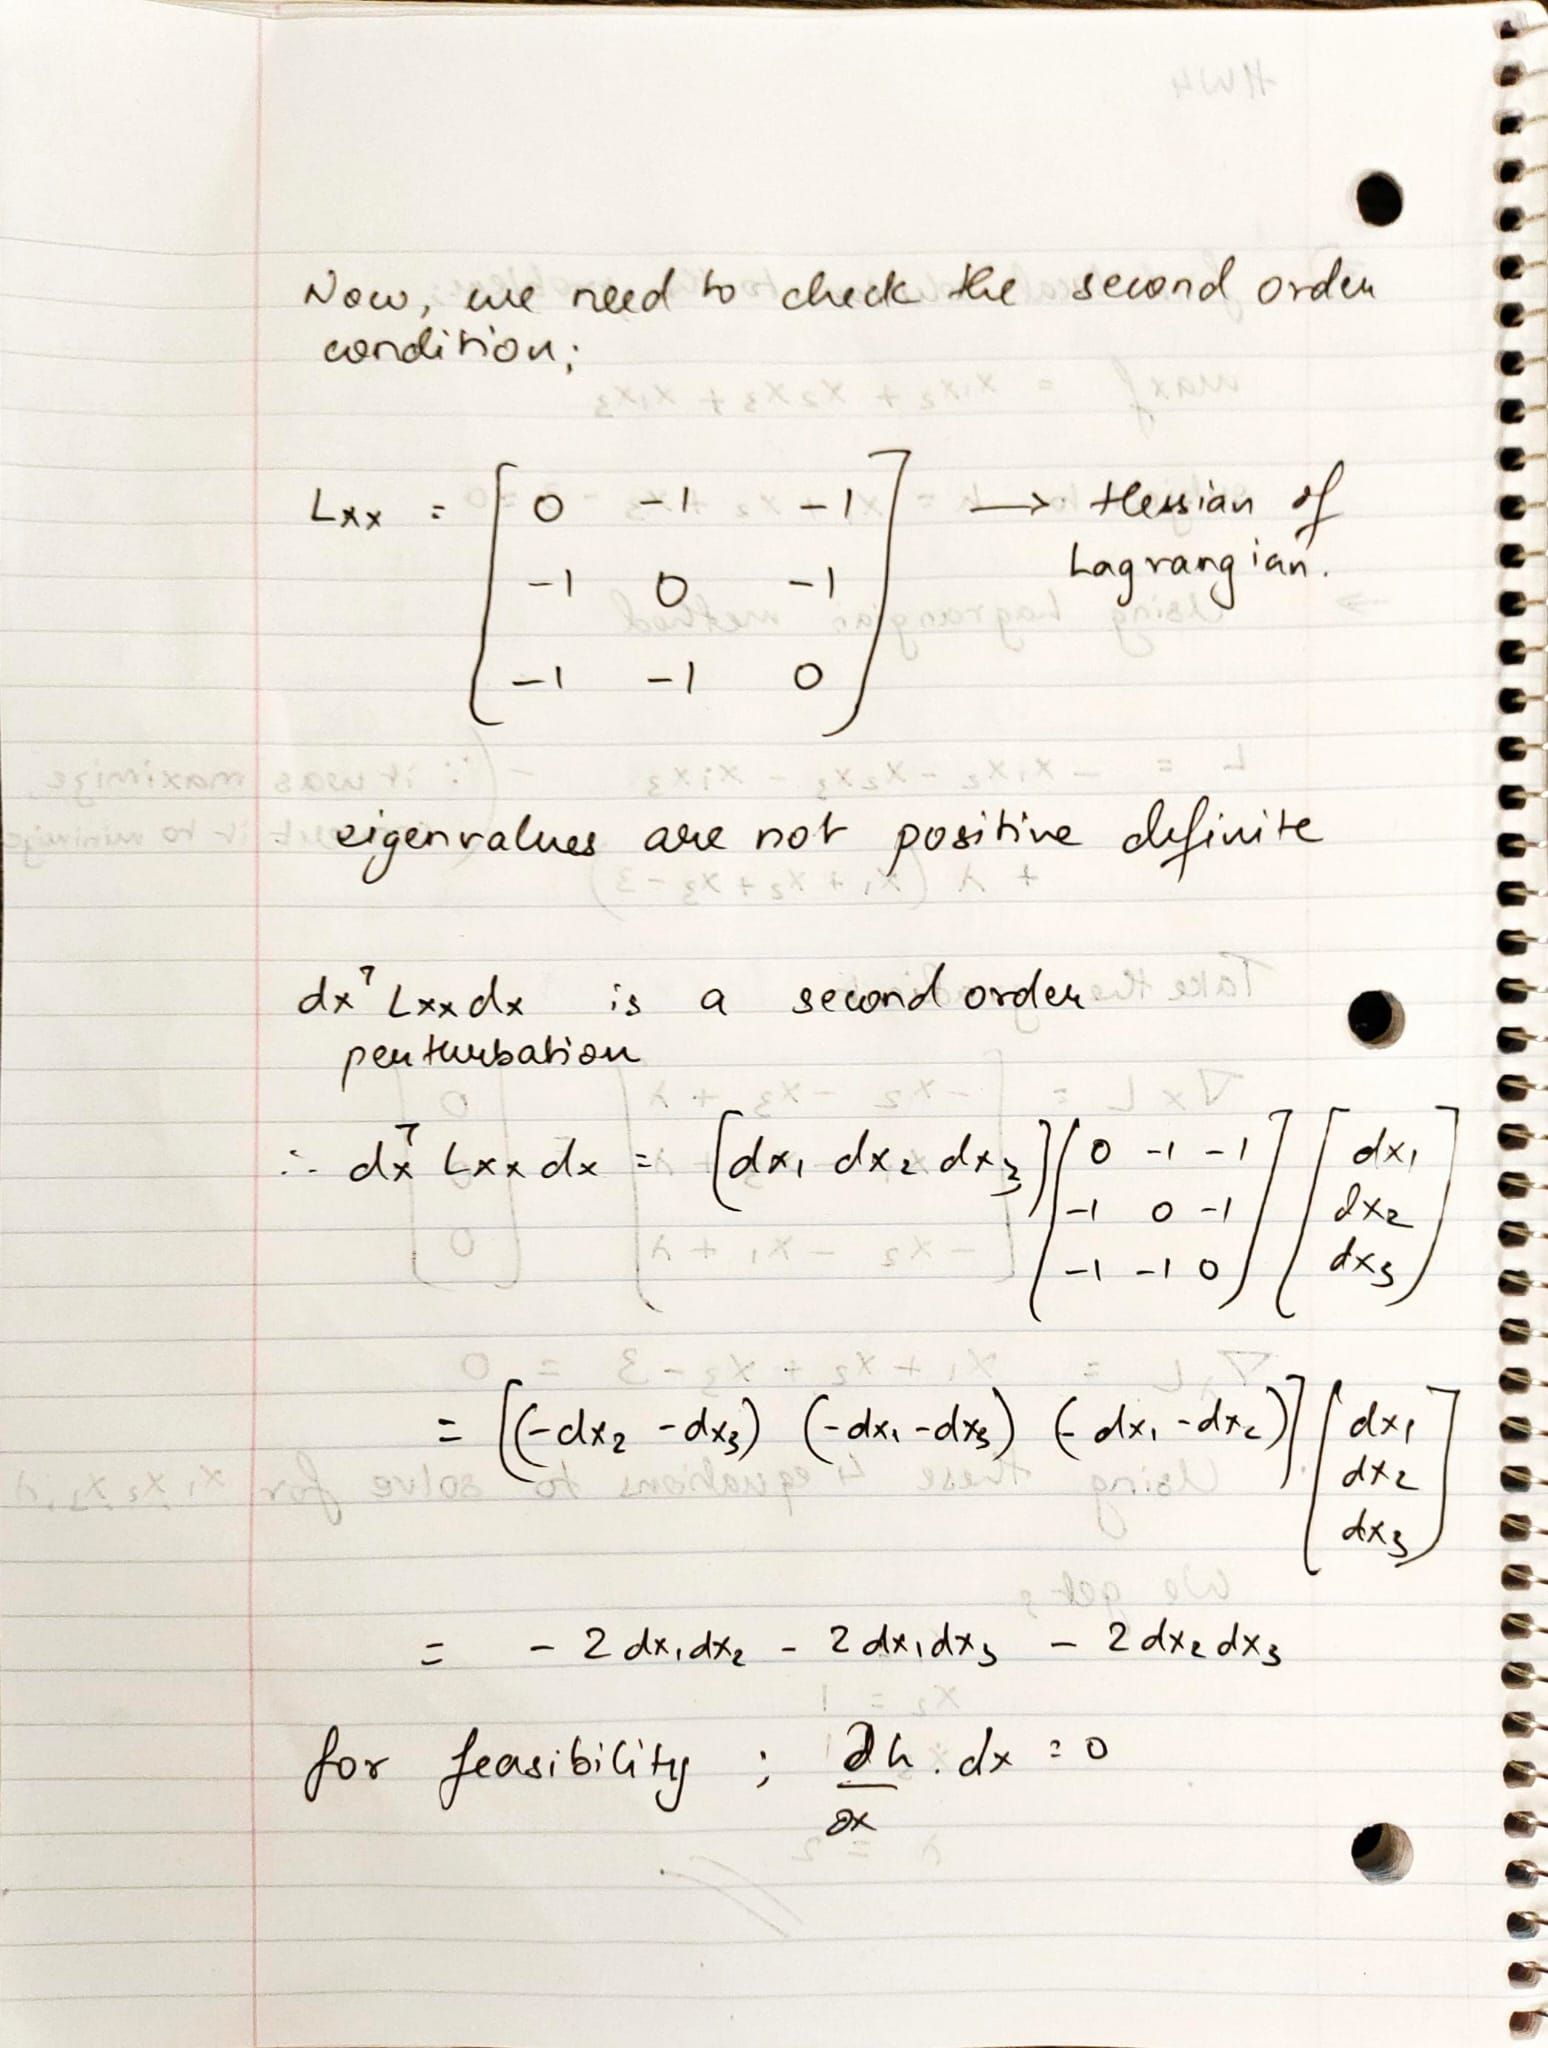

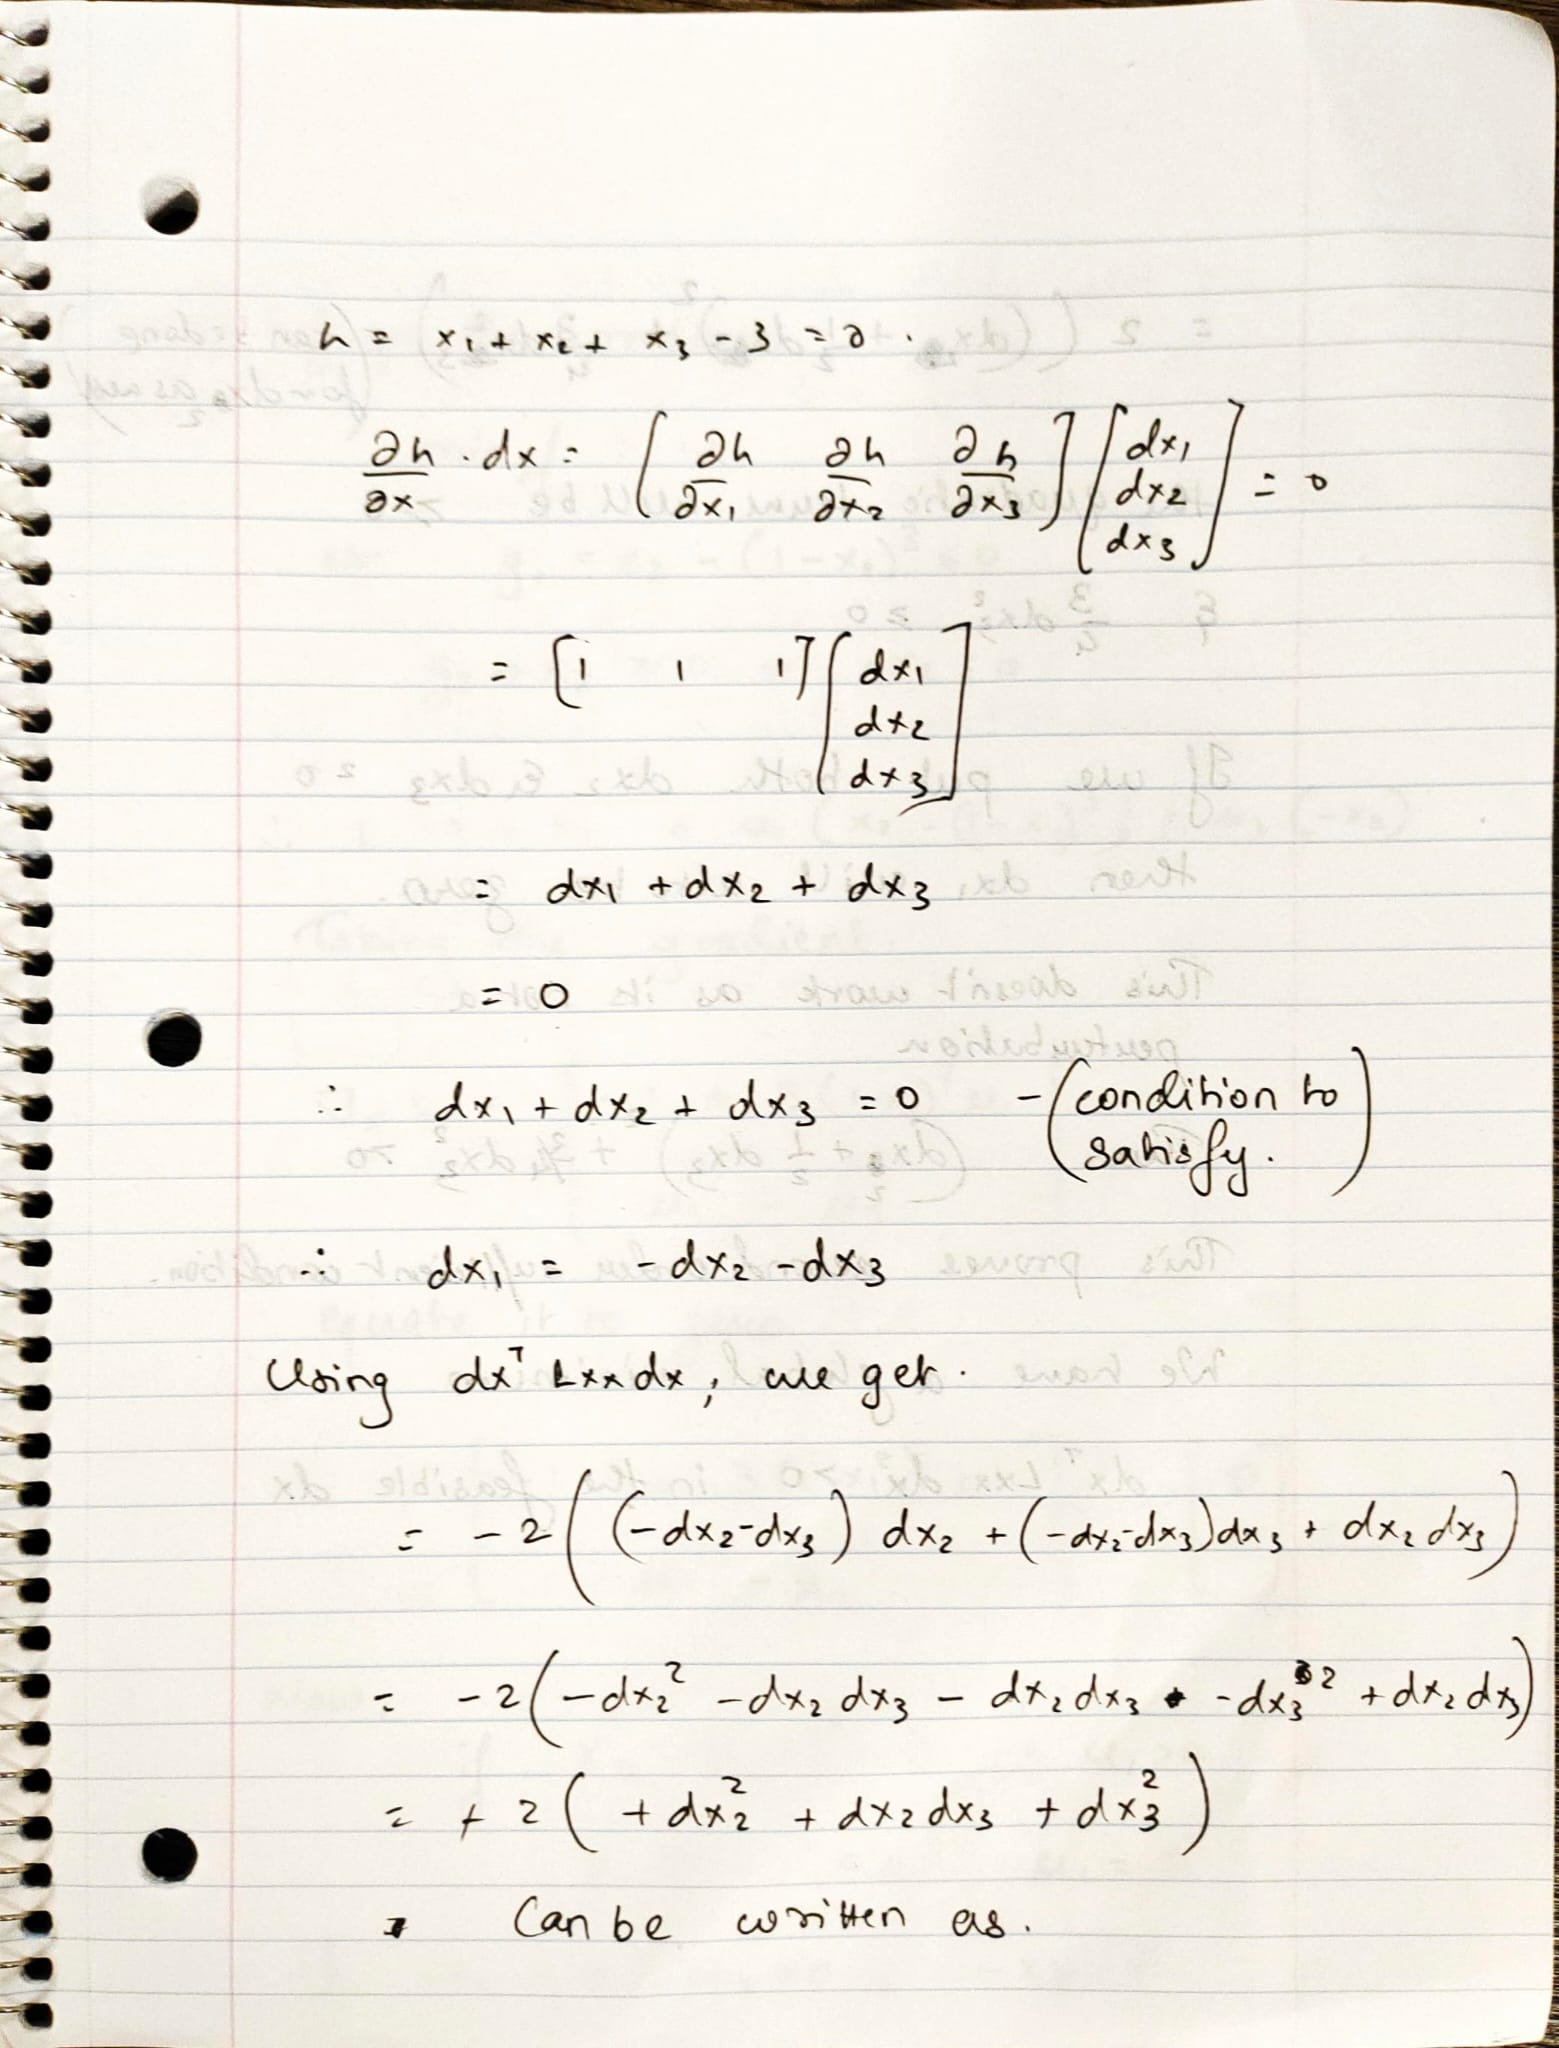

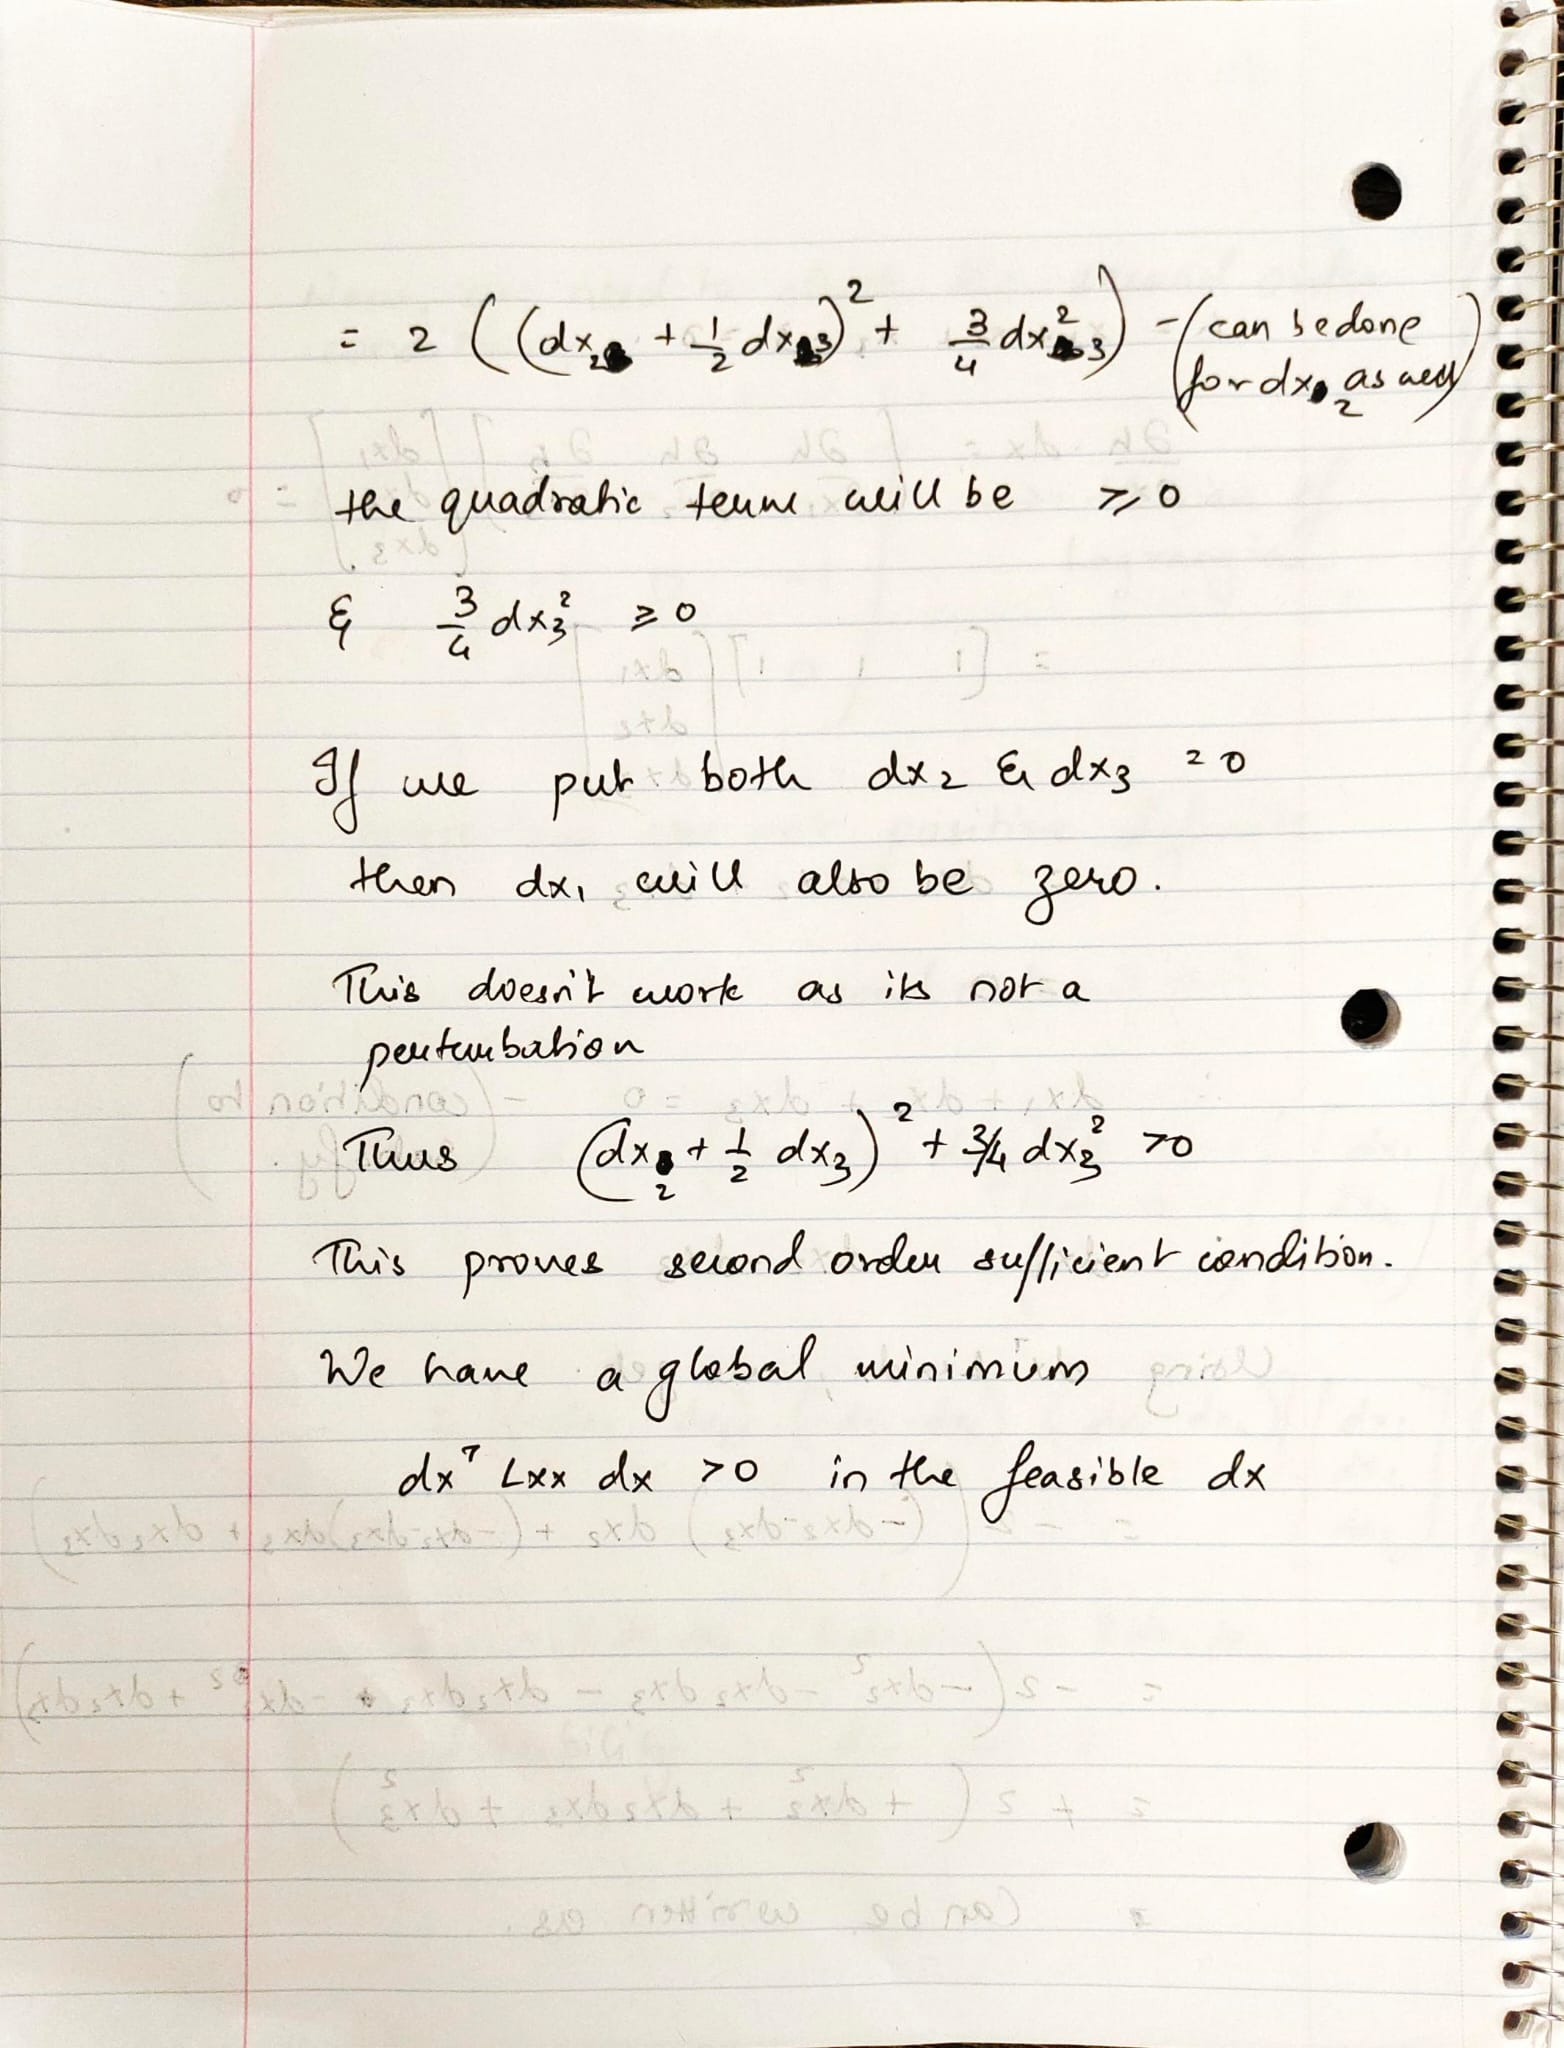

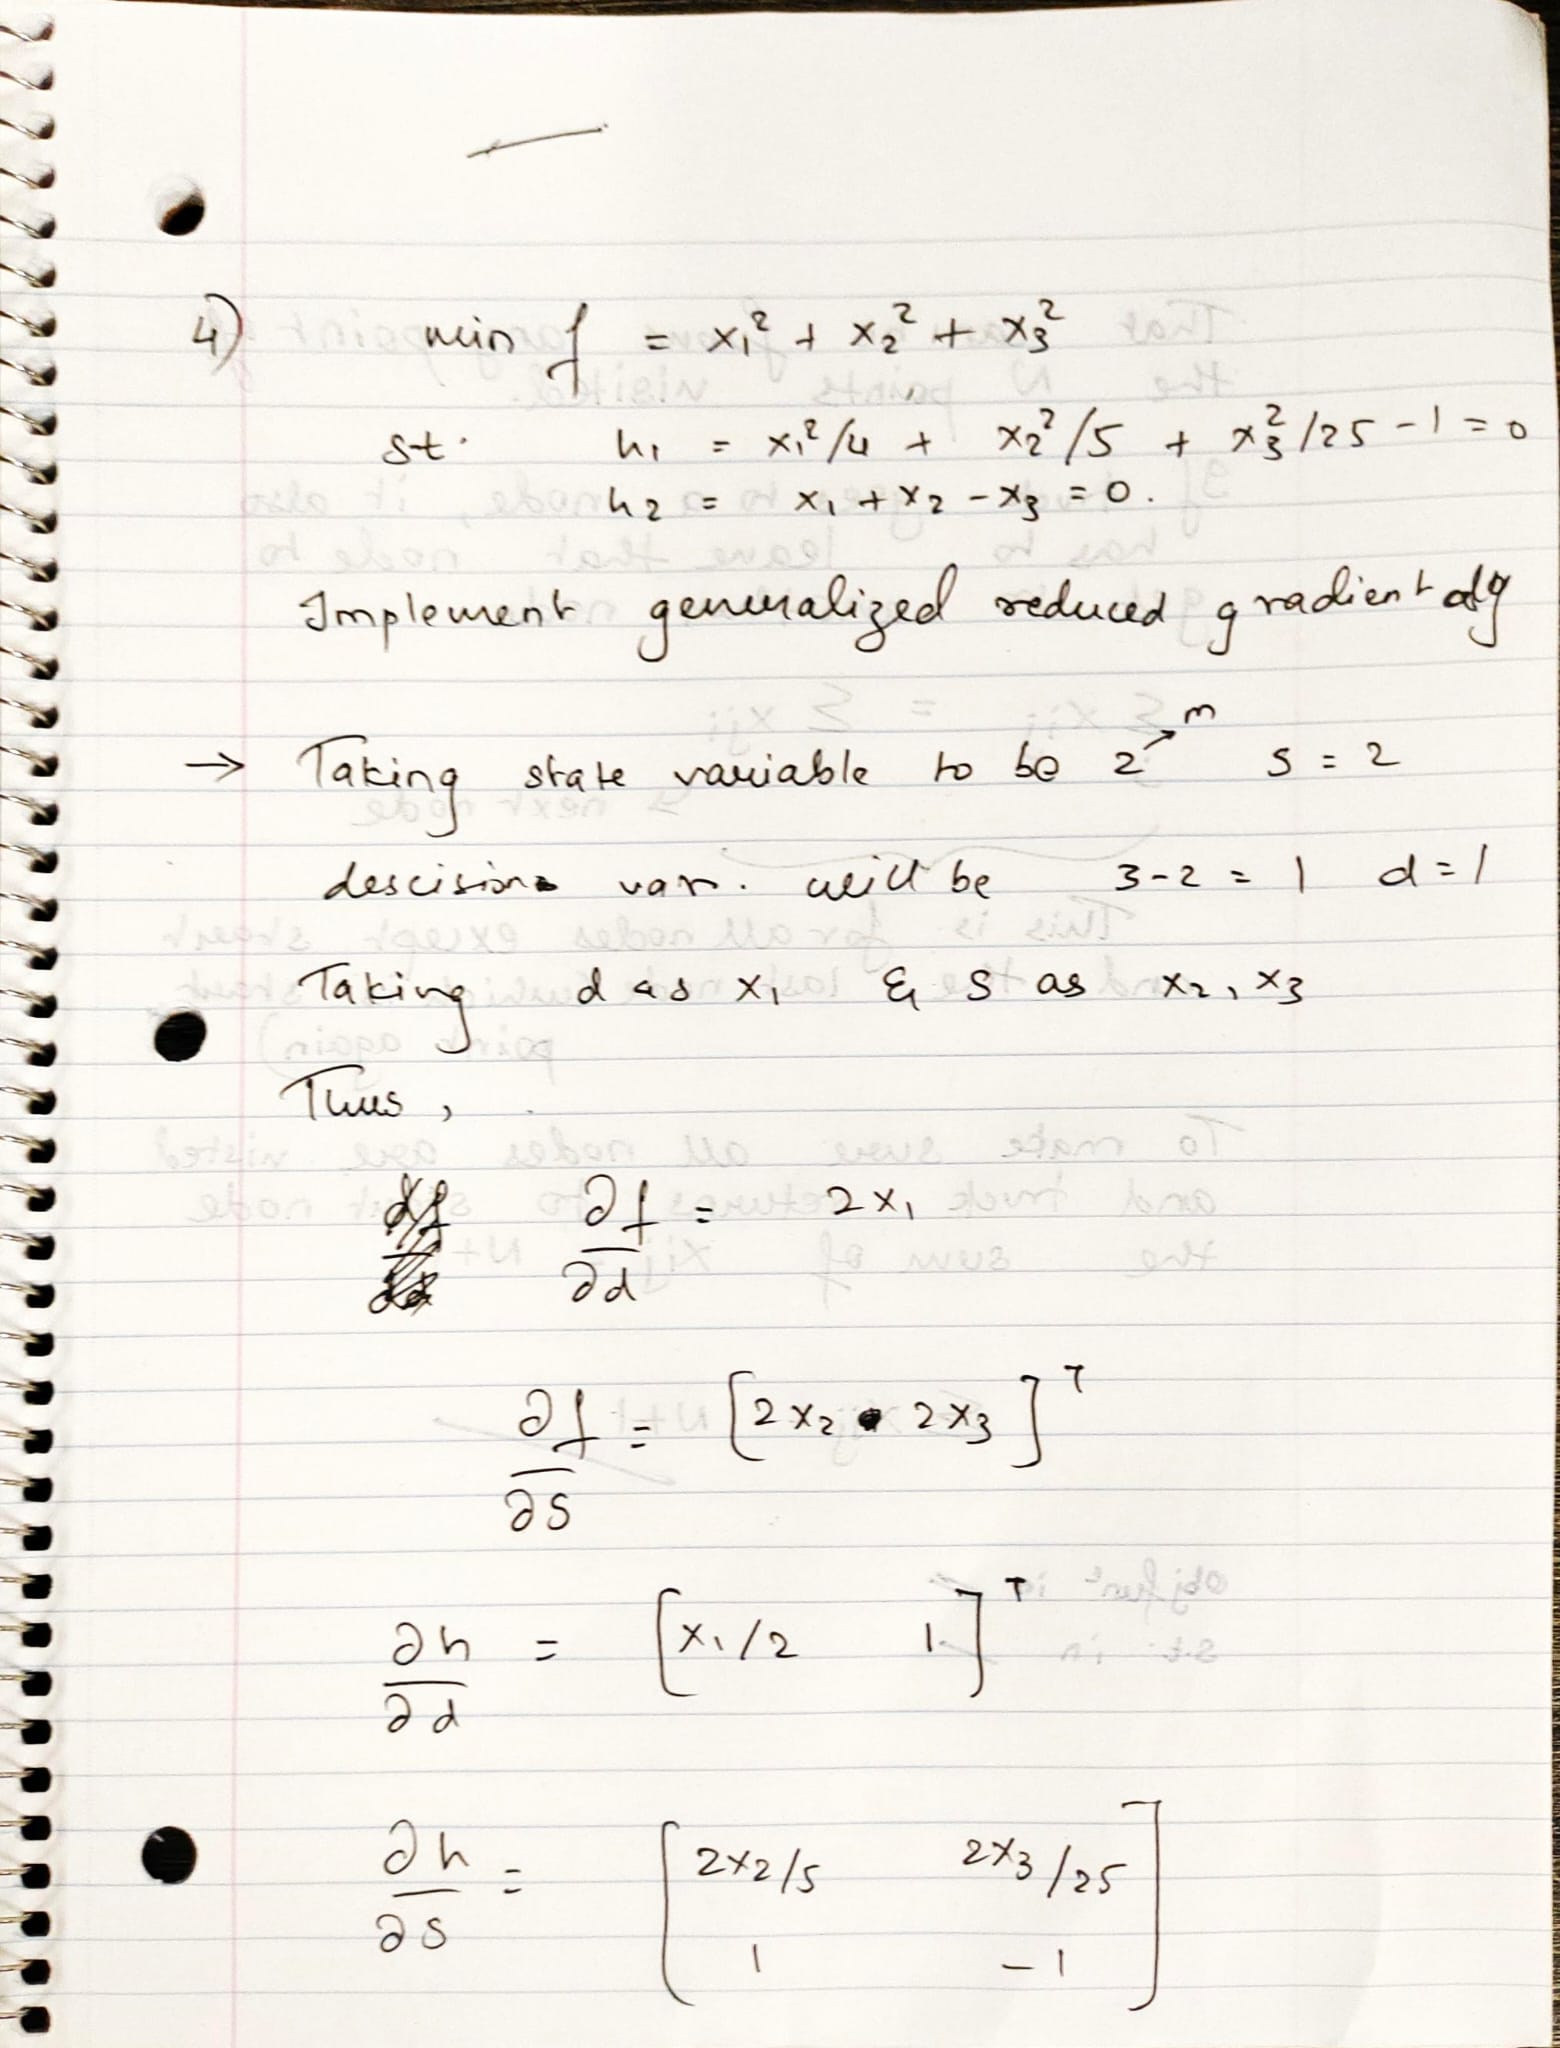

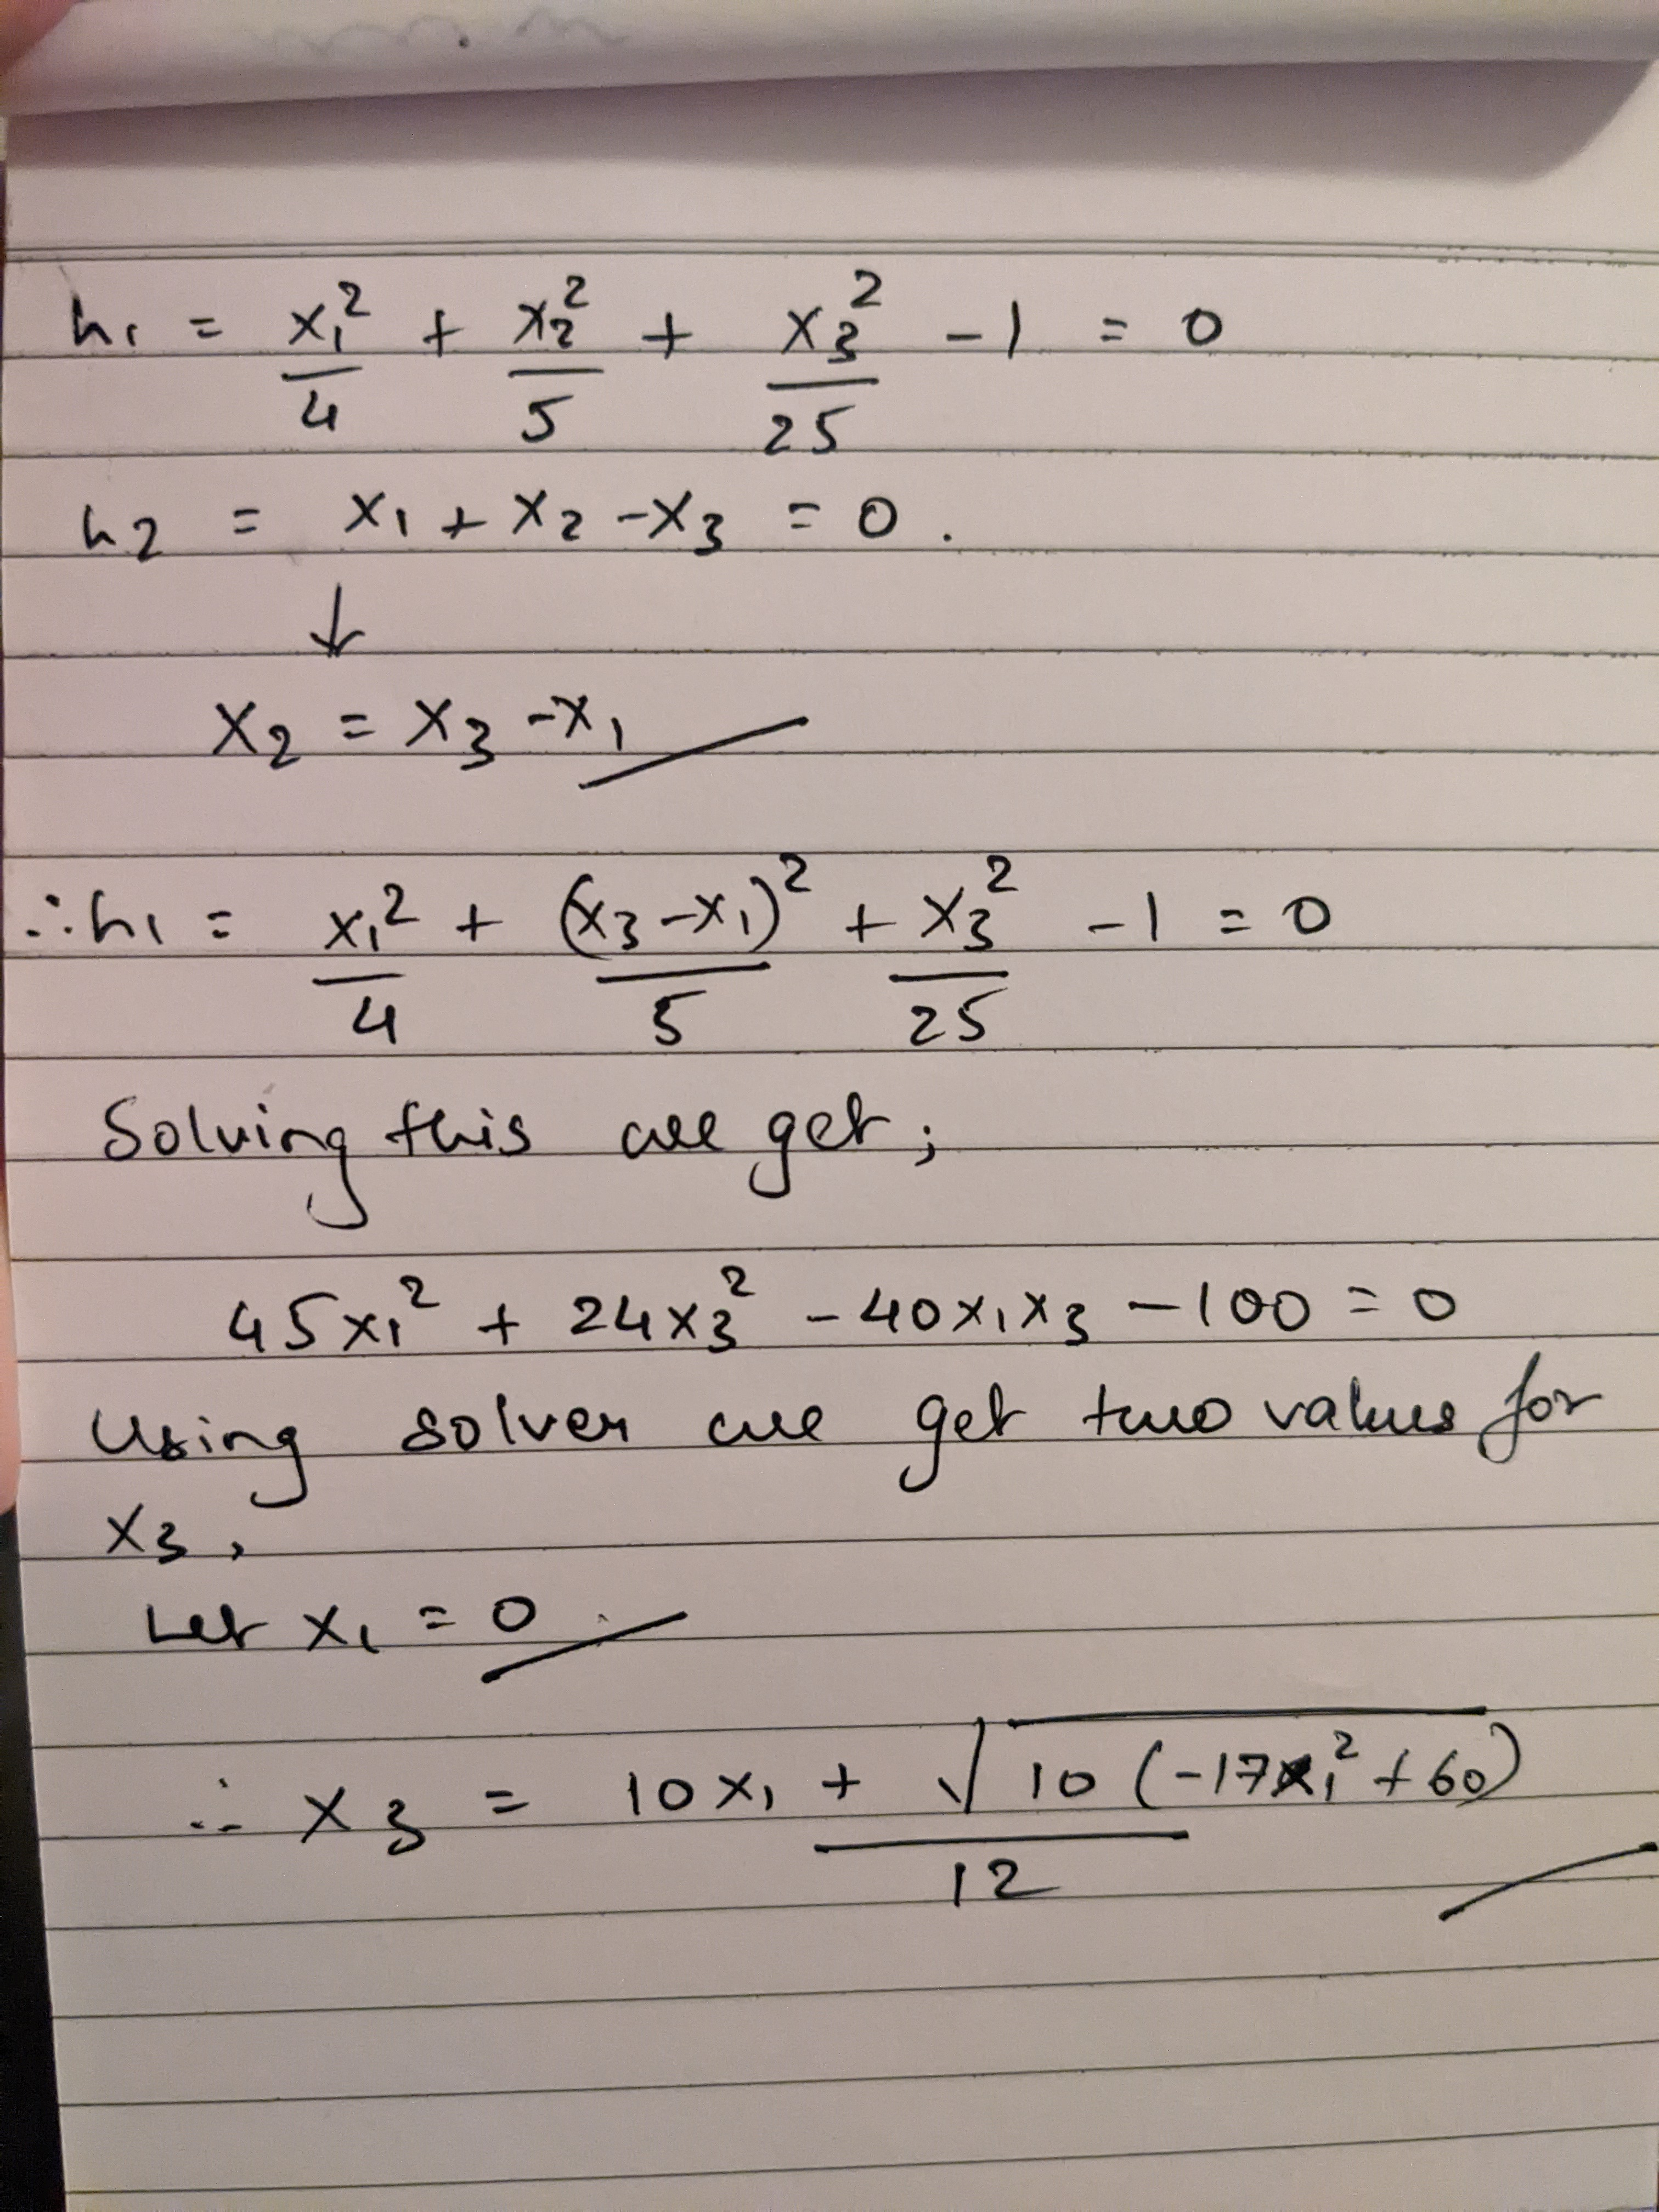

In [26]:
import numpy as np

def obj(x):
    return (x[0]**2) + (x[1]**2) + (x[2]**2)

def pfpd(x):
    return (2*x[0]) 

def pfps(x):
    return np.array([(2*x[1]), (2*x[2])])

def phps(x):
    return np.array([[((2/5)*x[1]), ((2/25)*x[2])],[1, -1]])

def phpd(x):
    return np.array([[x[0]/2],[1]])

def DFDD(x): # reduced gradient
    return pfpd(x) - np.matmul( np.matmul(pfps(x), np.linalg.inv(phps(x))), phpd(x))

eps = 0.001
k = 1

def f_alpha(x,a,dfdd):
    dk= (x[0] - (a * dfdd))
    sk= (x[1], x[2]) + (a * np.transpose(np.matmul(np.matmul(np.linalg.inv(phps(x)), phpd(x)), np.transpose([DFDD(x)]))))
    return np.append(dk,sk)

def linesearch(dfdd, x):
    a=1
    b=0.5
    t=0.3
    
    while obj(f_alpha(x,a,dfdd)) > (obj(x) - (a * t * (dfdd**2))):
        a = b * a
    return a

def solve(x): # Newton-Ralphson algorithm
    while np.linalg.norm(np.array([[((x[0]**2)/4) + ((x[1]**2)/5) + ((x[2]**2)/25) -1], [x[0] + x[1] - x[2]]])) > eps:
        phps_new = phps(x)
        sjk = np.transpose( np.transpose([x[1:3]]) - np.matmul(np.linalg.inv(phps_new), np.array([[((x[0]**2)/4) + ((x[1]**2)/5) + ((x[2]**2)/25) -1], [x[0] + x[1] - x[2]]]))) 
        x = np.append(x[0], np.transpose(sjk[0]))
    return x 

ini_guess = [np.array([0, 2.04124145, 2.04124145])] # from solving x1, x2, x3 with intial guess of x1 = 0
error = []

while np.linalg.norm(DFDD(ini_guess[-1])) > eps:
    x = ini_guess[-1]
    dfdd = DFDD(x)
    error.append(math.log(np.linalg.norm(dfdd)))
    lns = linesearch(dfdd, x)
    dk = x[0] - (lns * dfdd)
    sk0 = np.array([[x[1]], [x[2]]]) + (lns* np.transpose(np.matmul(np.matmul(np.linalg.inv(phps(x)), phpd(x)), np.transpose(dfdd))))
    xk0 = np.append(dk,sk0)  
    x = solve(xk0)
    ini_guess.append(x)
    k = k + 1
print(*ini_guess, sep ='\n')


[0.         2.04124145 2.04124145]
[-0.68041382  2.0160676   1.33565379]
[-1.43623774  1.55659929  0.12036155]
[-1.50664346  1.47047717 -0.03616629]
[-1.54543669  1.41822167 -0.12721502]
[-1.56313286  1.39285599 -0.17027687]
[-1.57004099  1.38267132 -0.18736967]
[-1.57250988  1.3789915  -0.19351838]
[-1.57335916  1.37772074 -0.19563842]
[-1.57364718  1.37728921 -0.19635797]
[-1.57374437  1.37714352 -0.19660085]


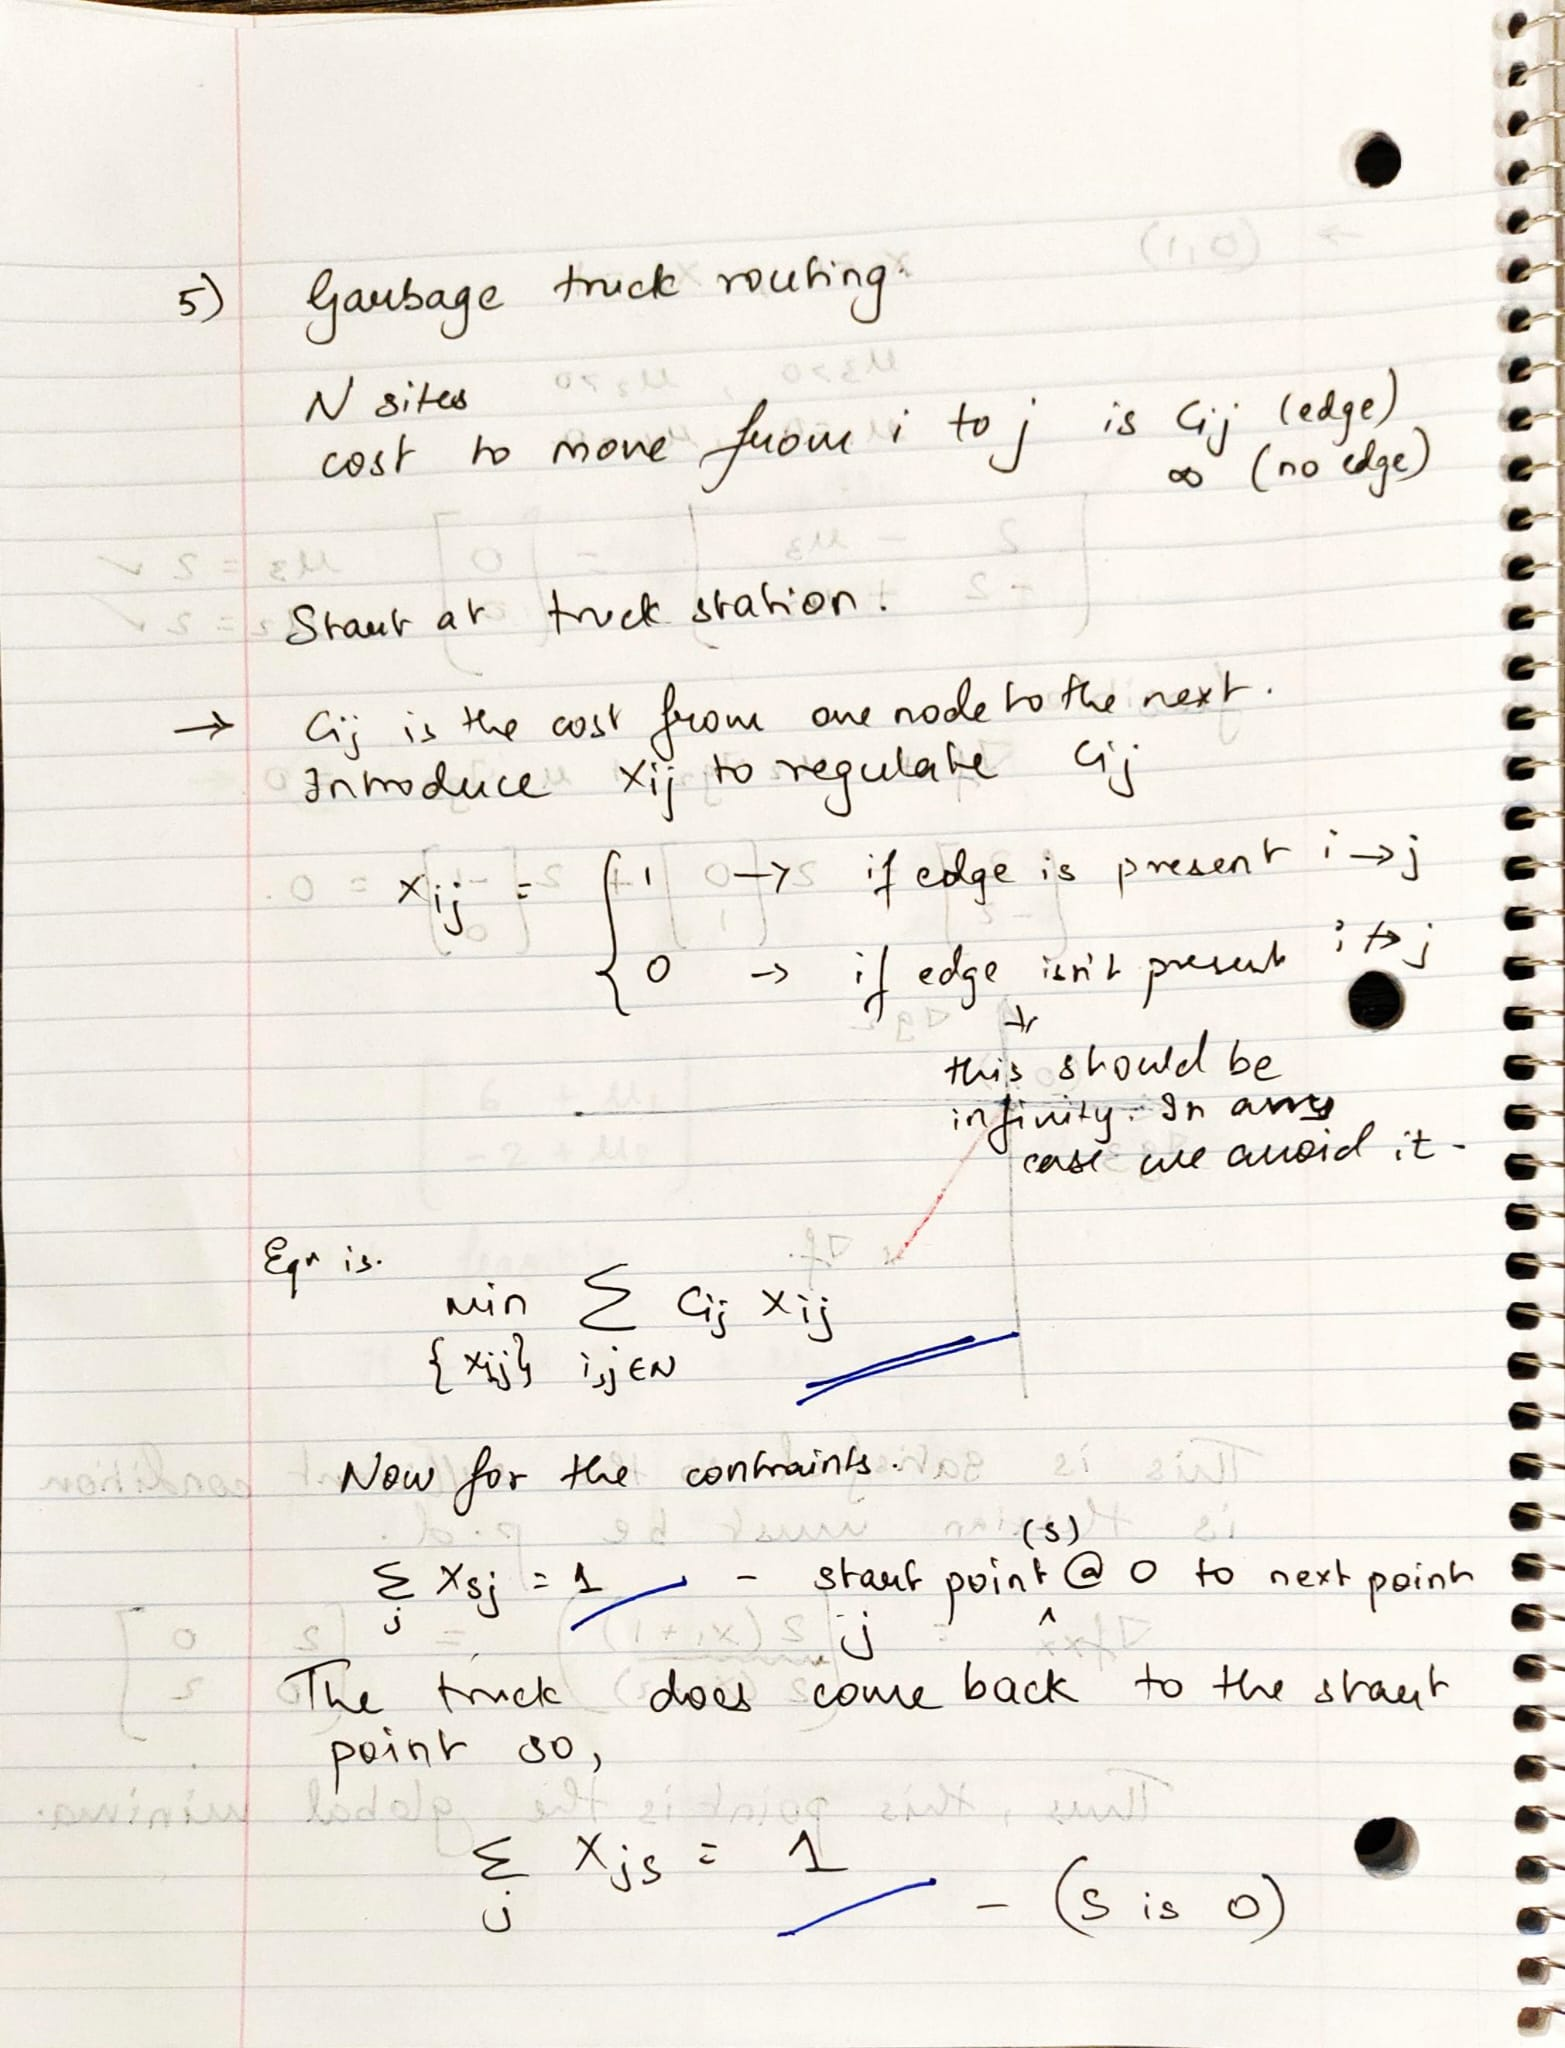

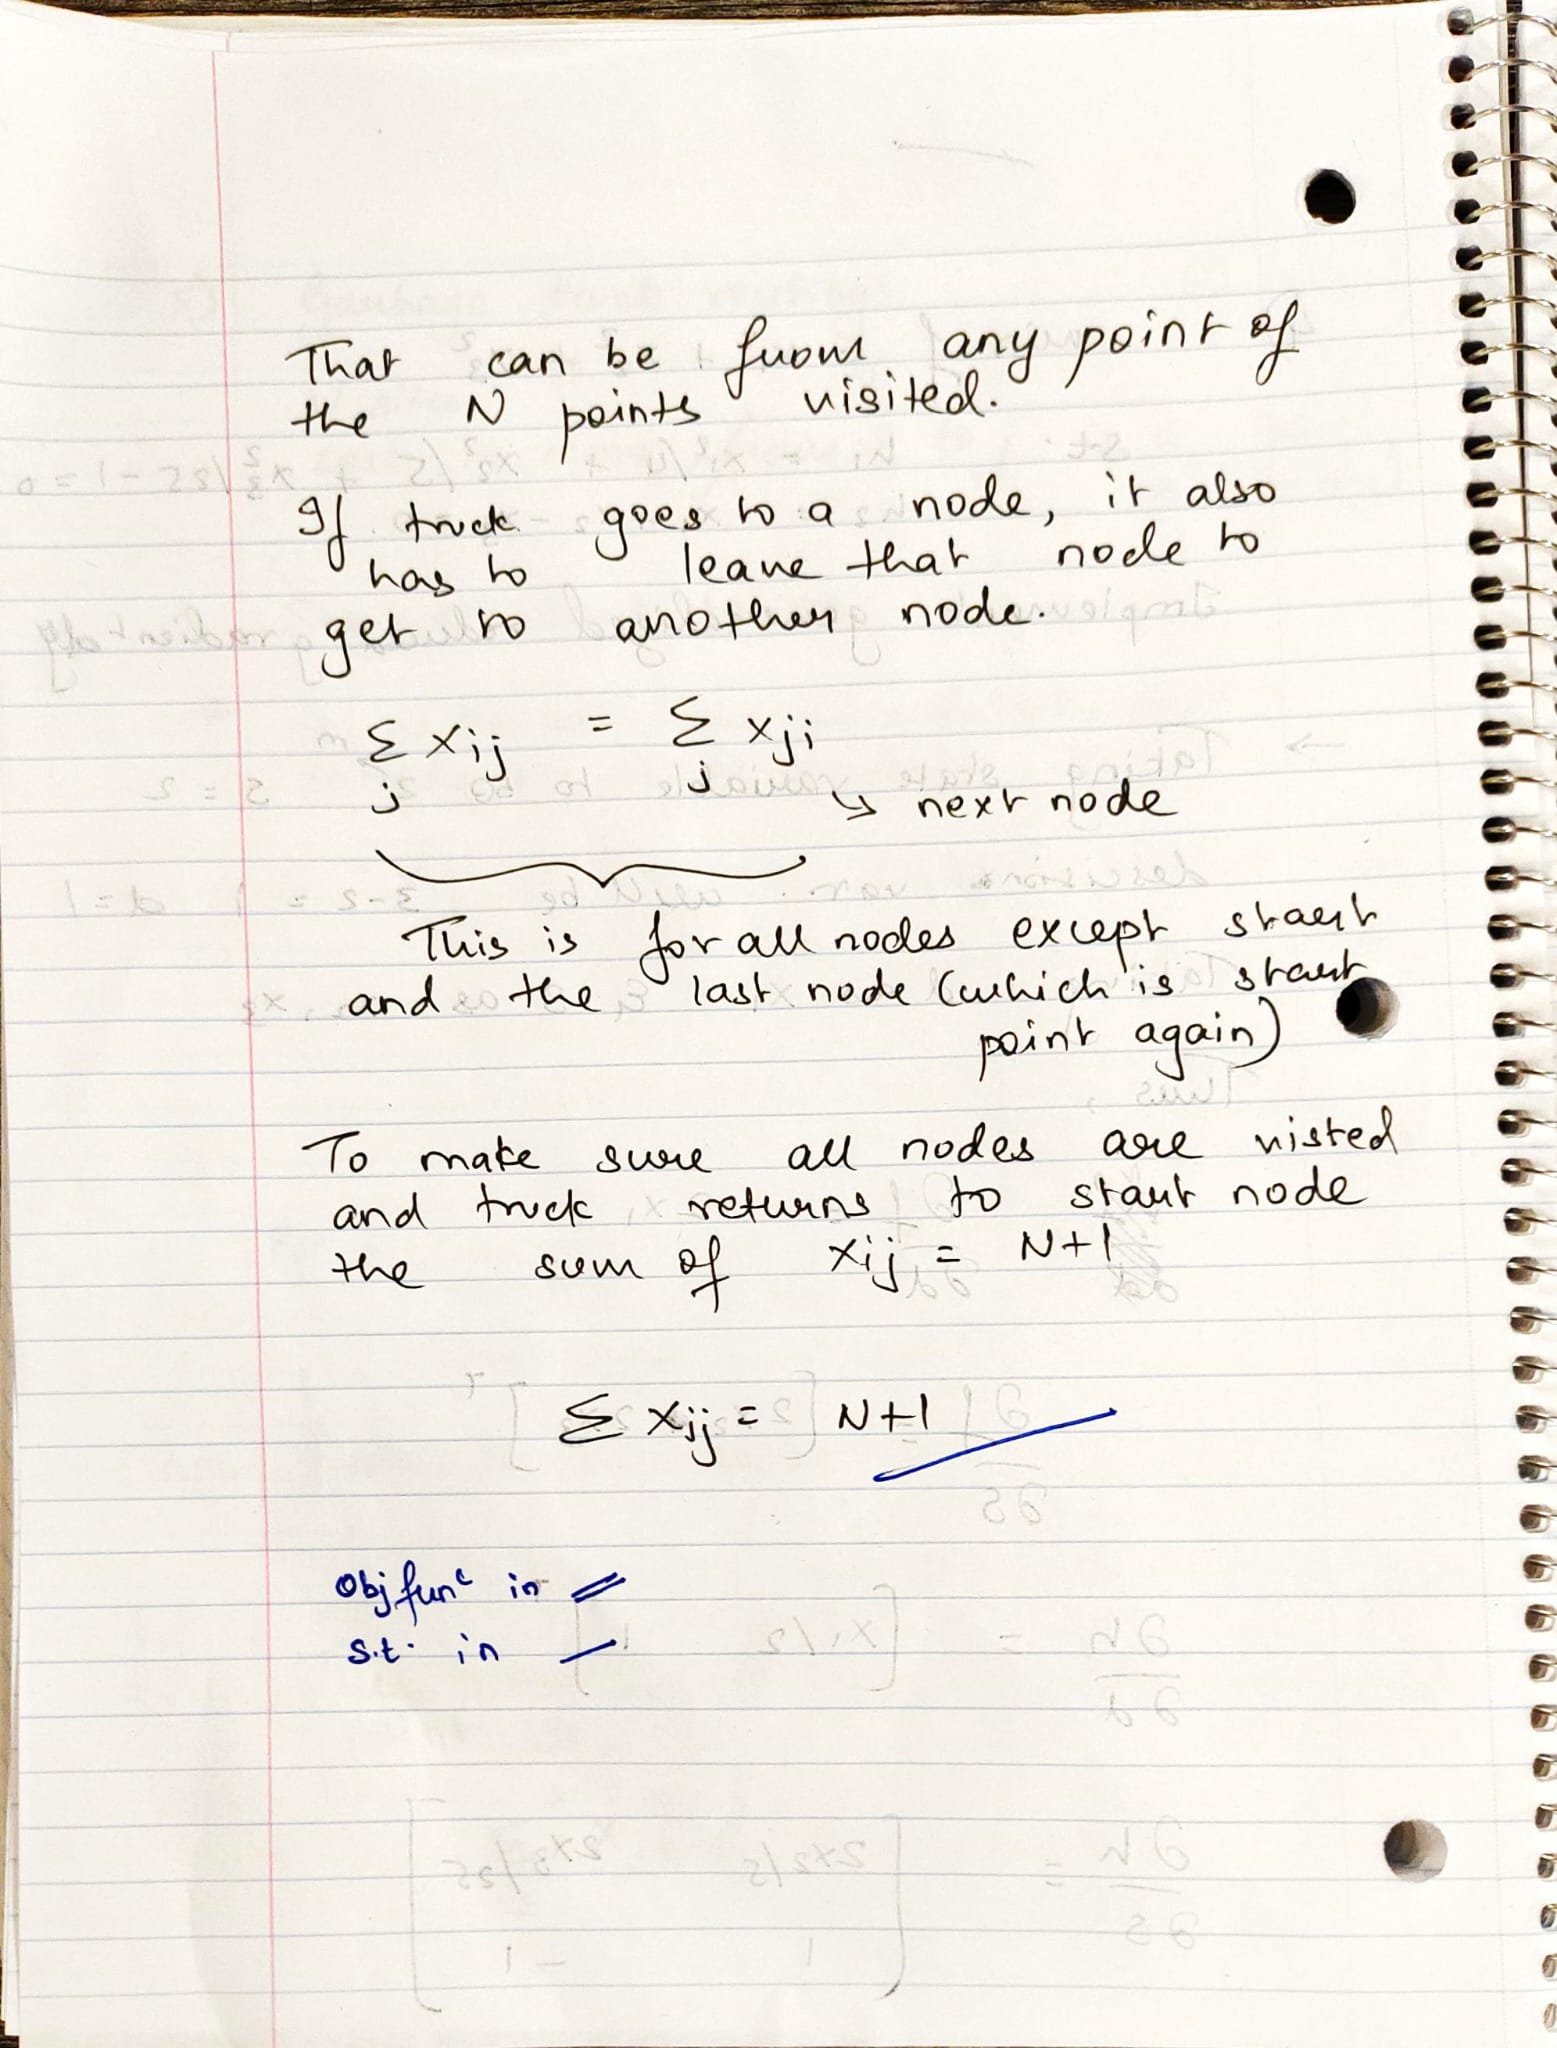